# Assessing significance of neutral objectives in League of Legends

### Table of contents

1. [Loading and saving libraries/data](#load)

2. [Querying Riot's API](#query)

3. [Data Proprocessing and exploration](#explore)

4. [Revised Machine Learning Model](#model)

5. [Results Summary and Future Directions](#results)

6. [Initial Machine Learning Model](#initial)

## Background Information
### Brief Game Overview
League of Legends (LOL) is a 5v5 multiplayer strategy game where each team's objective is to destroy the other team's Nexus, a structural objective. Every game takes place on the same map, Summoner's Rift (Fig 1) with the blue team on the bottom left side and the red team on the upper right side, and the same monsters (see Fig 1). Players spwan at the corner of their side of the map, located next to their team's Nexus. Over the course of the game, players must destroy a series of structural objectives - turrets and inhibitors - before getting access to the final objective located at the opposite corner of the map. 

### Neutral objectives Overview
Outside of the mandatory winning objectives, there are **neutral objectives** that are positioned closely to the diagonal division between the two teams, where the map division is visually indicated by a river. Neutral objectives are strong monsters that spawn in alcoves that both teams can access via openings facing the river. These monsters spawn at specific timepoints of the game as well as periodically spawn once an objective is killed. Killing neutral objectives grants unique buffs (in addition to the usual gold and experience) for the team who deals the final blow, and thus granting advantages which may swing the favor of a game or secure the stronger team's winning advantages.
Each type of monster grants a unique buff for the team who kills it, as determined by the player who deals the final blow. Neutral objectives include **dragons, rift heralds, and baron nashors**. Dragons are further divided into 4 elemental types (water, fire, air, earth)  and an additional Elder type. Each dragon type is categorized as different features for this project, as each dragon type grants a unique buff. 

### Predicting LOL Game Outcome
Predicting game outcome based on post-game or real-time stats usually involves as many significantly relevant features as possible. These numbers include: **player kills, structural objectives captured, gold, experience, items, and neutral objectives**. There have been other project looking at the predictive power of very specific features, such as the champions selected by the players, and individual professional e-sports players. I have not found any projects focusing on the importance of objectives nor one that is up-to-date with the latest objective changes for the current season.


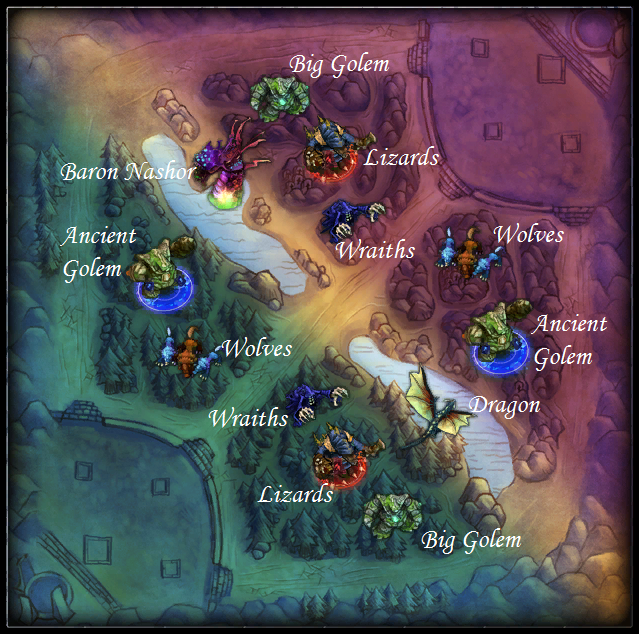

Figure 1. Summoner's Rift Map with labelled monster objectives.

### Why focus on neutral objectives?
The relative benefits and importance of these neutral monster objectives are widely debated. The objectives are geographically split on the game map, with rift herald and baron spawning on the top side and dragons spawning on the bottom side of the map. The split locations often force teams to choose between prioritizing the two locations; the enemy team is usually able to "trade" these objectives by taking the other neutral objective located at the opposite side of the map. Even if one team is behind and unable to contest an objective, the weaker team is usually able to either take the neutral objective located at the other side of the map or a structural objective. The objective dilemma becomes more significant in professional e-sports, where skilled players are able to utilize small advantages gained from capturing neutral objectives to swing the game in their favor or to further a lead into victory.

This project aims to provide insight on the relative importance of neutral objectives throughout the course of the game, helping players make optimal decisions regarding objectives. The anaylzed match data was extracted via the [Riot Games API](https://developer.riotgames.com/apis) and contains over 20,000 NA high elo solo/duo ranked matches from masters, Grandmasters, and Challenger tier players in the North American server on patch 10.11.

# Project Overview

There are two components to this project:
1. Train a binary classifier model for predicting the winner of a game at different times of a game
    - Two different models were trained to predict the winner of each game, red side or blue side. The models both use only features related to neutral objectives for training and prediction. In contrast, predictive LOL models usually would try to include all relevant statistics such as team gold and kills. However, the focus of this project is to evaluate only specifically the predictive power of one type of resource: neutral objectives.

2. Assess the relative importance of neutral objectives to predicting game outcomes
    - The number of objectives captured up to different timepoints in a game will be used to predict the winner. This will examine the importance of different objective types in predicting the game winner.
    - feature importance weights will be extracted from the trained model

### Model 1:
- **Post-game features**: Model 1 used features related to neutral objectives for each team at the end of the game, e.g. number of barons taken by the blue team.


### Model 2:
- **Time Intervals**: I was interested in the predictive power of neutral objectives at different points of the game, since the value of a dragon varies at different times in the game. At 5 minute intervals for each game, the winner is predicted using neutral objective numbers at that timepoint. 
- **Streamlined features**: I chose to express the features differently, rather than each feature relating to a team (e.g. number of barons captured by the red team), features are expressed as a difference between the two teams, e.g. the difference in number of barons captured between the two teamss. This massively streamlines the number of features and increases interpretability with minimal data loss.


## Evaluation Metrics


Predicting wins in sports lends itself to gambling applications, and thus the models will be evaluated as such; of course, the current model has limited practical applications since it only work mid-game or post-game, while e-sports betting usually happens pre-game. Of the metrics in a confusion matrix, precision would be more valuable than recall for this project. Recall refers to the number of blue-win games that were correctly classified as such, while precision refers to the proportion of correct predictions (TP) of all blue-win predictions (TP+FP). Maximizing the chance that a winning prediction is correct is critical for minimizing the financial risks of betting on a single game. Recall is less important since bets are generally based on individual games. F1 score is also used as a metric to balance precision and recall. 


Fortunately, the outcome dataset is balanced - the blue and red sides are designed such that there is practically no advantage to be on either side.

### Results of initial model

#### Dragon Soul

The data does seem to reflect what people think of the relative power levels of dragon souls - ocean is the most powerful IF you get it early. Cloud soul also contributes towards wins if it's obtained earlier in the game. This makes sense since ocean and cloud drake both grant advantages early and mid-game, but these advantages decrease as the game goes on. Come late game, the players' stats will have scaled enough and the game's pace will change to even out these dragon soul advantages. 

Ocean soul grants extra health and mana regeneration out of combat, which will help one team stay healthy throughout midgames during skirmishes, extended seiges and teamfights. Since it boosts regeneration, ocean soul is only useful if at least some players on a team stay alive after combat. Turrets still do significant damage to players midgame, so even if not everyone on a is alive, ocean soul helps the alive players stay healthy to defend with the safety of  structures. As the game goes on, player damage will have also increased to the point that players are more likely to die and the death timers are longer. Additionally, structural defenses, turrets, do less meaningful damage to players while players can destroy them more easily. As deaths become more impactful, any player who remain alive on a team while some of their teammates are dead find that ocean soul becomes less helpful in defense. 

Cloud soul increases movement speed and cooldown reduction on spells, granting one team a tempo advantage in moving around the map and having increased access to useful ultimate spells. Player will have more CDR items and have decreased cooldowns with higher level spells, so players will be more likely to have equal access to their ultimate spells later in the game. 

Infernal soul, on the other hand, remains powerful regardless of when the team obtains it. The infernal soul grants percent-based permanent damage bonuses to a team, so that advantage remains throughout the course of a game.

The top 5 most predictive features are:
1. team that takes first inhibitor
2. number of elemental dragons taken by red team
3. number of elemental dragons taken by blue team
4. number of baron kills taken by the red team
5. team that takes first tower

Which team kills the first inhibitor seems to be the best predictor of who will win the game. This makes sense since killing an inhibitor is the most direct path towards killing the enemy nexus. The first inhibitor kill accounts for 60% of the weights for predicting the game winner. 

The total number of elemental drakes taken by a team is the next best predictor, with red team dragon kills being slightly more predictive than blue team's. Without doing further analysis it's hard to say whether this difference is statistically significant. We can speculate that perhaps the red team's larger relative distance from the dragon pit compared to the blue team means that red team naturally has less control over the dragon; therefore, if the red team is successful at capturing dragon objectives, red likely has a strong control over the game carrying over to wins.

The order of importance of neutral objectives to the game result seems to be:
#### elemental dragons > baron > elder dragon > rift herald

### Early objectives

Of all the early objectives available (inhibitor, tower, dragon, baron, rift herald), it seems that the non-neutral objectives, inhibitors and towers, are the most predictive, followed by dragon and baron. First rift herald seem to have no predictive weight on the winner at all.

Of course, the associations here must be taken with a grain of salt before tranlating them to causation. Having early game pressure will translate to more objective control. However, it is very telling that first dragon has more weight than first herald, when both of these objectives are usually captured around the same time and are often "traded" for each other (if one team takes one, the other team will take the other).

# Model 2 Results Summary

Although this project is unable to establish causal relationships, it identified interesting relationships between different types of neutral objectives, game time, and the winning team:
- among the "firsts" in objectives, first inhibitor is most predictive of the winner followed by first baron and first tower very closely together.

The top 5 most post-game predictive features are:
1. team that takes first inhibitor
2. elemental dragons difference
3. game duration
4. baron kill difference
5. team that takes first baron / team that takes first tower






### Early objectives

Of all the early objectives available (inhibitor, tower, dragon, baron, rift herald), the order of their importances are. 

#### First inhibitor > First baron > First tower > First dragon > First rift herald

Of course, the associations here must be taken with a grain of salt before tranlating them to causation - other than First Inhibitor, the differences in weights between the objectives are not big. Having early game pressure will translate to more objective control. However, it is very telling that first dragon has more weight than first herald, when both of these objectives are usually captured around the same time and are often "traded" for each other (if one team takes one, the other team will take the other).

Different types of objectives seem to be the most valuable (associated with winning) at different points in the game:
- 10 mins: **elemental dragon differences**, in order of Ocean > Infernal > Mountain > Cloud. 
    - While this may suggest that the order is related to the degree of advantage the dragon bestows on a team, it's just as possible that the order reflects prioritization of the dragon types. For example, the ocean dragons are regarded as beneficial for early laning phases, so advantaged team may expend more effort securing the dragon than for a cloud dragon.
    - considering the priority that teams place on dragons right now as a stepping stone to obtaining dragon soul, the weakness of the individual dragons, and the fact that the soul drake element is not reveal until after the 2nd dragon is killed, it seems likely that the weight differences here stem from the degree of advantages conferred by different types of dragons.
- 15-20 mins: **rift herald difference** - if the rift herald is captured early enough, it will spawn a second time as a stronger buff. The rift herald will despawn at 20 minutes if not killed, so the window of most significance during 15 and 20 minutes reflects this nicely. The 20 minute association is stronger than the 15 minute one in accordance with the rift herald's strength.
- 25-35 mins: **Baron nashor difference** at 35 mins, soul dragons and elder dragons become more significant, but their effects are still overshadowed by literally every other objective. 

### Elemental Dragons
It seems that elemental dragon advantages - those found in early game - are much more significantly associated with wins than souls. Certainly part of the reason for the association may be the translation of early game advantages, obtained from outside of neutral objectives (e.g. lane dominance, successful skirmishes), into capturing neutral objectives. There is still the logical possibility of a causal relationship. 

Individiual elemental dragons might be weak (and they are far weaker than in previous seasons), but they are far more significantly related to wins than the objectively stronger elder dragons and dragon souls. The small advantages conferred by individual drakes in the early game might help teams dominate over the enemy team and snowball further advantages.
To better establish a causal relationship, Assessing how teams prioritize between the different objectives would be useful to establish a causal relationship. The relatively small importances that souls have towards wins compared to the initial direct correlation might be that by the time these late-game objectives are available, wins are already decided by early game snowballing.

# Future work/directions:
- adding predictions based on different points of time in the game
- for the time series, change the temporary buff features (e.g. rift herald, Elder dragon, baron) so that each gamestate interval will only reflect the objectives captured in that time interval (vs. having a cumulative count)
- adding lane positions to assess their impact on objective control
- try fitting a XGBoost Classifier model, a variation of the Gradient Boosting Classifier used for the project
- add other relevant match variables: team gold, kills, wards, champion picks, etc.
- expand number of matches in dataset - due to time practicality limitations, only 20,000 matches were extracted of over 60,000 match IDs obtained
- expand data to servers in other geographical regions - e.g. EU, China, Korean
- expand data to lower elos, since masters+ is a very small proportion of the playerbase and may not reflect what the predictors are in lower elo (e.g. Bronze, Silver, Gold)
- evaluate competitive play, which plays out differently than solo queue, and where objective decisions matter more than anywhere else

<a id='load'></a>
### Loading libraries and data, saving data

In [1]:
import requests, json
import numpy as np
import importlib
import pandas as pd
import pickle
import os

from riotwatcher import LolWatcher, ApiError
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import pdb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from src import data_preprocessing as p
from src import visuals as v

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, classification_report

### Load saved data

In [4]:
%%time
gamestate_by_time_dict = p.load_pkl('data/gamestate_by_time_dict.pkl')

Wall time: 51.9 ms


In [5]:
%%time
match_results_dict = p.load_pkl('data/match_results_dict.pkl')

Wall time: 60.8 ms


In [6]:
%%time
match_detail_dict = p.load_pkl('data/match_detail_dict.pkl')

Wall time: 4.68 s


In [ ]:
#warning: LARGE file
%%time
match_timeline_dict = p.load_pkl('data/match_timeline_dict.pkl')

In [7]:
%%time
matchlist = p.load_pkl('data/matchlist.pkl')

Wall time: 4.99 ms


In [15]:
%%time
list_time_dicts = p.load_pkl('data/list_time_dicts.pkl')

Wall time: 63.8 ms


In [16]:
%%time
match_results_dict = p.load_pkl('data/match_results_dict.pkl')

Wall time: 40.9 ms


In [17]:
%%time
gamestate_by_time_dict = p.load_pkl('data/gamestate_by_time_dict.pkl')

Wall time: 52.9 ms


In [18]:
%%time
filled_gamestate_by_time_dict = p.load_pkl('data/filled_gamestate_by_time_dict.pkl')

Wall time: 16.9 ms


In [9]:
#load unprocessed df (immediately after extraction from dict)
df = pd.read_csv('data/match_stats_df.csv')

In [10]:
df

Unnamed: 0  GameDuration Winner firstTower firstInhibitor firstDragon  \
0      3411673088          1195    red        red            red         red   
1      3435528193          1516   blue       blue            red         NaN   
2      3447586821          1964   blue        red            red         red   
3      3426877449           915    red        red            NaN         red   
4      3419144205          1176    red        red            red         red   
...           ...           ...    ...        ...            ...         ...   
19995  3436877728          2184    red        red            red         red   
19996  3422984098          1112   blue       blue           blue         red   
19997  3342243749          1880    red       blue            red        blue   
19998  3448805286          1105    red        red            NaN         red   
19999  3427833767           896   blue       blue           blue        blue   

      firstRiftHerald  bluebaronKills  redbaronKills  blueriftHeraldKills  \
0                blue               0              0                    1   
1                 NaN               0              0                    0   
2                 NaN               1              0                    0   
3                 red               0              0                    0   
4                blue               0              0                    1   
...               ...             ...            ...                  ...   
19995             red               0              2                    0   
19996            blue               0              0                    1   
19997            blue               0              1                    1   
19998            blue               0              0                    1   
19999             NaN               0              0                    0   

       ...  2ELDER_DRAGONtime  7AIR_DRAGONteam  7AIR_DRAGONtime  \
0      ...                NaN              NaN              NaN   
1      ...                NaN              NaN              NaN   
2      ...                NaN              NaN              NaN   
3      ...                NaN              NaN              NaN   
4      ...                NaN              NaN              NaN   
...    ...                ...              ...              ...   
19995  ...                NaN              NaN              NaN   
19996  ...                NaN              NaN              NaN   
19997  ...                NaN              NaN              NaN   
19998  ...                NaN              NaN              NaN   
19999  ...                NaN              NaN              NaN   

       7WATER_DRAGONteam  7WATER_DRAGONtime  3ELDER_DRAGONteam  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                    NaN                NaN                NaN   
3                    NaN                NaN                NaN   
4                    NaN                NaN                NaN   
...                  ...                ...                ...   
19995                NaN                NaN                NaN   
19996                NaN                NaN                NaN   
19997                NaN                NaN                NaN   
19998                NaN                NaN                NaN   
19999                NaN                NaN                NaN   

       3ELDER_DRAGONtime  BARON_NASHOR5team  BARON_NASHOR5time soul_team  
0                    NaN                NaN                NaN       NaN  
1                    NaN                NaN                NaN       NaN  
2                    NaN                NaN                NaN       red  
3                    NaN                NaN                NaN       NaN  
4                    NaN                NaN                NaN       NaN  
...                  ...                ...                ...       ... 

In [35]:
#df of match results extracted from dict with dragon soul feat added
df_results = pd.read_csv('data/df_results.csv', index_col=0)

In [36]:
df_results

GameDuration Winner firstTower firstInhibitor firstDragon  \
3411673088          1195    red        red            red         red   
3435528193          1516   blue       blue            red         NaN   
3447586821          1964   blue        red            red         red   
3426877449           915    red        red            NaN         red   
3419144205          1176    red        red            red         red   
...                  ...    ...        ...            ...         ...   
3444742545          1326    red        red            red         red   
3424164242          1915   blue       blue           blue        blue   
3405814162          1208    red        red            red        blue   
3419838867          1305   blue       blue           blue        blue   
3447495054          1658    red        red            red         red   

           firstRiftHerald  baronKillsdiff  riftHeraldKillsdiff  \
3411673088            blue               0                    1   
3435528193             NaN               0                    0   
3447586821             NaN               1                    0   
3426877449             red               0                   -1   
3419144205            blue               0                    0   
...                    ...             ...                  ...   
3444742545             red              -1                   -1   
3424164242            blue               1                    1   
3405814162            blue               0                    0   
3419838867            blue               0                    2   
3447495054            blue               0                    2   

            dragonKillsdiff  FIRE_DRAGONdiff  EARTH_DRAGONdiff firstBaron  \
3411673088               -2             -1.0              -1.0        NaN   
3435528193                0              NaN               NaN        NaN   
3447586821               -3             -2.0              -1.0       blue   
3426877449               -2              NaN              -1.0        NaN   
3419144205               -2             -1.0               NaN        NaN   
...                     ...              ...               ...        ...   
3444742545               -3             -1.0              -1.0        red   
3424164242                1              NaN               1.0       blue   
3405814162               -1              1.0              -1.0        NaN   
3419838867                3              1.0               1.0        NaN   
3447495054               -2              NaN              -1.0        NaN   

           FIRE_DRAGONSoul  AIR_DRAGONdiff  ELDER_DRAGONdiff  \
3411673088             NaN             NaN               NaN   
3435528193             NaN             NaN               NaN   
3447586821             red            -1.0               1.0   
3426877449             NaN             NaN               NaN   
3419144205             NaN             NaN               NaN   
...                    ...             ...               ...   
3444742545             NaN            -1.0               NaN   
3424164242             NaN             1.0               NaN   
3405814162             NaN             NaN               NaN   
3419838867             NaN             NaN               NaN   
3447495054             NaN             NaN               NaN   

            WATER_DRAGONdiff EARTH_DRAGONSoul WATER_DRAGONSoul AIR_DRAGONSoul  
3411673088               NaN              NaN              NaN            NaN  
3435528193               NaN              NaN              NaN            NaN  
3447586821               NaN              NaN              NaN            NaN  
3426877449              -1.0              NaN              NaN            NaN  
3419144205              -1.0              NaN              NaN            NaN  
...                      ...              ...              ...            ...  
3444742545               NaN              NaN              NaN            Na

In [8]:
int(match_detail_dict[3447355549]['gameDuration']/60)

32

In [8]:
len(match_timeline_dict[3447355549]['frames'])

34

In [32]:
match_timeline_dict[3447355549]['frames']

[{'participantFrames': {'1': {'participantId': 5,
    'position': {'x': 560, 'y': 581},
    'currentGold': 500,
    'totalGold': 500,
    'level': 1,
    'xp': 0,
    'minionsKilled': 0,
    'jungleMinionsKilled': 0,
    'dominionScore': 0,
    'teamScore': 0},
   '2': {'participantId': 1,
    'position': {'x': 560, 'y': 361},
    'currentGold': 500,
    'totalGold': 500,
    'level': 1,
    'xp': 0,
    'minionsKilled': 0,
    'jungleMinionsKilled': 0,
    'dominionScore': 0,
    'teamScore': 0},
   '3': {'participantId': 3,
    'position': {'x': 351, 'y': 293},
    'currentGold': 500,
    'totalGold': 500,
    'level': 1,
    'xp': 0,
    'minionsKilled': 0,
    'jungleMinionsKilled': 0,
    'dominionScore': 0,
    'teamScore': 0},
   '4': {'participantId': 4,
    'position': {'x': 221, 'y': 471},
    'currentGold': 500,
    'totalGold': 500,
    'level': 1,
    'xp': 0,
    'minionsKilled': 0,
    'jungleMinionsKilled': 0,
    'dominionScore': 0,
    'teamScore': 0},
   '5': {'parti

In [3]:
#text_file = open("high_elo_accIds.txt", "w")
#text_file.write()
#text_file.close()

In [613]:
p.save_txt(str(match_stats_dict), 'data/match_stats_dict.txt')

In [ ]:
p.pkl_file(match_dict, 'data/match_dict.pkl')

In [585]:
p.pkl_file(high_elo_accIds, 'data/high_elo_accIds.pkl')

In [678]:
p.pkl_file(match_detail_dict, 'data/match_detail_dict.pkl')

In [679]:
p.pkl_file(match_stats_dict, 'data/match_stats_dict.pkl')

In [910]:
p.pkl_file(match_timeline_dict, 'data/match_timeline_dict.pkl')

In [10]:
p.pkl_file(matchlist, 'data/matchlist.pkl')

In [121]:
p.pkl_file(list_time_dicts, 'data/list_time_dicts.pkl')

In [229]:
p.pkl_file(match_results_dict, 'data/match_results_dict.pkl')

In [230]:
p.pkl_file(gamestate_by_time_dict, 'data/gamestate_by_time_dict.pkl')

In [92]:
p.pkl_file(filled_gamestate_by_time_dict, 'data/filled_gamestate_by_time_dict.pkl')

In [71]:
p.pkl_file(best_clf, 'data/best_clf.pkl')

In [6]:
len(match_detail_dict)

20275

In [7]:
len(match_timeline_dict)

28627

In [908]:
df.to_csv('data/match_stats_df.csv')

In [14]:
df_results.to_csv('data/df_results.csv')

In [31]:
df_filled.to_csv('data/df_filled_results.csv')

In [208]:
def rand(to_shuffle):
    '''
    Shuffle a copy without disturbing original list
    '''
    shuffled_copy = to_shuffle.copy()
    random.shuffle(shuffled_copy)
    return shuffled_copy

<a id='query'></a>
# Extracting data from Riot API: 

[Riot API](https://developer.riotgames.com/apis) only allows for extraction of match IDs through user accounts, not through elo rankings and times. A list of high elo matches were obtained by extracting summoner names of high elo ranks and compiling a list of their most recent matches. The [riotwatcher wrapper API](https://riot-watcher.readthedocs.io/en/) was used to facilitate extracting data.

## Summoner names

Get a list of players in high elo ranks (Master, Grandmaster, Challenger)

In [593]:
# golbal variables
api_key = 'RGAPI-14651911-2597-416c-9c96-63fa72f1a5bb'
watcher = LolWatcher(api_key)
my_region = 'na1'
queue_type = 'RANKED_SOLO_5x5'

In [27]:
#get list of high elo players
chall_players = watcher.league.challenger_by_queue(my_region, queue_type)
master_players = watcher.league.masters_by_queue(my_region, queue_type)
GM_players = watcher.league.grandmaster_by_queue(my_region, queue_type)

In [50]:
#compile list of summoner IDs for list of high elo players
high_elo_summonerIds = []
for entry in chall_players['entries']:
    high_elo_summonerIds.append(entry['summonerId'])
for entry in master_players['entries']:
    high_elo_summonerIds.append(entry['summonerId'])
for entry in GM_players['entries']:
    high_elo_summonerIds.append(entry['summonerId'])

In [47]:
chall_players

{'tier': 'CHALLENGER',
 'leagueId': 'c60807e8-6afb-38fd-ab9b-ae8588dc8b27',
 'queue': 'RANKED_SOLO_5x5',
 'name': "Kha'Zix's Warriors",
 'entries': [{'summonerId': 'aKgW_wqkTJ-nkuMnAzmcNjdlsWCFRlACgLFdttNBWvKcZIc',
   'summonerName': 'Kandori',
   'leaguePoints': 841,
   'rank': 'I',
   'wins': 224,
   'losses': 187,
   'veteran': True,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': False},
  {'summonerId': 'bE44fVre61r8szwuoOjlDx3_29SkNDH9qslIPoIX6MdNQXyN',
   'summonerName': 'ADCADC123',
   'leaguePoints': 1160,
   'rank': 'I',
   'wins': 344,
   'losses': 277,
   'veteran': True,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': False},
  {'summonerId': 'KouvFsnpxQ9H91W09mioR_0-qS0wduVKPLpjnIZUWdLuT3to',
   'summonerName': 'Kral Closer',
   'leaguePoints': 979,
   'rank': 'I',
   'wins': 313,
   'losses': 268,
   'veteran': True,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': True},
  {'summonerId': 'QhGwGPOLg2fT2wdonRDW-LdFok_2Ebr-zeYOHO42w

In [46]:
chall_players['entries'][0]

{'summonerId': 'aKgW_wqkTJ-nkuMnAzmcNjdlsWCFRlACgLFdttNBWvKcZIc',
 'summonerName': 'Kandori',
 'leaguePoints': 841,
 'rank': 'I',
 'wins': 224,
 'losses': 187,
 'veteran': True,
 'inactive': False,
 'freshBlood': False,
 'hotStreak': False}

## Account ID

Convert summoner ID's to account ID's (to use for obtaining match IDs later)

In [55]:
watcher.summoner.by_id(my_region, 'aKgW_wqkTJ-nkuMnAzmcNjdlsWCFRlACgLFdttNBWvKcZIc')['accountId']

'_JBrw5ZEaW9y9ABf2VQ9Zwul4lJmTngiuVsm7XznoKHxOw'

In [65]:
test_accId = '_JBrw5ZEaW9y9ABf2VQ9Zwul4lJmTngiuVsm7XznoKHxOw'

In [56]:
%%time
#convert summoner IDs into account IDs to obtain match IDs later
high_elo_accIds = []
for summonerID in high_elo_summonerIds:
    high_elo_accIds.append(watcher.summoner.by_id(my_region, summonerID)['accountId'])

In [57]:
len(high_elo_accIds)

1255

In [58]:
high_elo_accIds

['_JBrw5ZEaW9y9ABf2VQ9Zwul4lJmTngiuVsm7XznoKHxOw',
 'hp3wQzf0Qcs5Fnj45_P0AUXBz7-DAYnJUYWKrcbSwCh8urCBpHG-GrrS',
 '29IxleXM4jPS5T2KmsFdxcbZFZlCCzD4-OQxXI4gURHVse8nyP_OYfYc',
 'DDzNcXIIaSnXqjFJWjvaOtOqRQoXiohNDAAF9Vv7tU0Gt1k',
 'DmIsL2U_YfkFvgPHAaNc7gnnei2xALo0CxikkoQ0SGjYhMU',
 'vKZQmQbwbaA2KWAhnK_pX8CI-G54swj6jHPvB32iIk03aA',
 'p-FDVXL2PVCuWf4-NyWOwfJsUsTwkmTsdvexpCUwRr0Rqf2J1Siq9IQx',
 'XYHw7RBsdt4zKlz6vBy6Azhst8yjFubcHSfLcfgt21_m0Q',
 '49ktgxVhbcxyTXpK-5F4lhsCRzEyLocg7aVKeqy9_Q',
 'GDjOrucdAH-Eydcm7Rdjmht69RbnVJ-dCLP9gstfMuqndj4',
 'Wfr7qym3OXhzMhjBxqNzo3N-L0HfHhW0_j4ywWuW7L0XbA',
 'mq9jRuXgZNXVxDKDMc92HPMZPSmHFF5dNdAbZAMIjntINzk',
 'GjCSfQ1jcIzOrQ49U8n9oUQaQRBPXpl2Jaj232tQq24xMJAQedSNnoRB',
 'NGYs92mmMn4U0WnZeYx8X10DlamLMOAKlbLOvLHXVx9YtwE',
 '3-TmucbFNpODk8hOqAX50o8gVvzUlgFWcHlAy9o2X7L6g70',
 '1eYnztK2x432-JeNev1eiDIMqLKWFtlE21IINb6pG2XWQs0Z1hq24gjW',
 'xOlB6nXvNMjW-h81jpuU0bkzwadmidIydQLUcppsRI0RJVA',
 'vOOeJ_pye8EbVBPcKOeP9LXDIZQ92z6cb6Sxza_k1rR5mw',
 'BK3NHYNRh0EXUz7SgaucgbDn79d

In [62]:
#since the summoners extracted by rank, randomize list to reduce chance of bias
import random
unordered_accIds = high_elo_accIds.copy()
random.shuffle(unordered_accIds)

In [63]:
unordered_accIds

['RnUXqlcP4OlBPCbrSKoAxsHtDmaNafqfAEd6_WDTcMQ-6gTrD-xjfS-6',
 'jyGwEUPhn4LIoL-MDW15jpug3c3vTEi-TF-6JZaLIo3Uh7RgpGMA6zOQ',
 'oyZh8APFpeMuaSNjzHo9GOkIhlHnilk2jwM0AzzWlcdmAg',
 '_Xp0EnkmOv20Sb5D8cdCWiesDpw14i5tnQbTDGc3dcsROg',
 'hJn4wTkJszvRVi-j1m52OhydZ6JZ93D0puqqN111XW52tiMBq20N7bXo',
 '7EFoYbzJJVBzk2CPC_fdkTQ5xS_LLGYoxRC5QCwpljF9hzk',
 'L6p1svYEiPHFZ1cHeUZnNEwApCpcGk9v-hOE0YltcShOo1hP85eJdVyf',
 'm5CgWtjAl6qHwB0-52nmGAWPzkG7khFlCpVOEqqAFeSGkQ',
 '7kGR7NMehaF3WzQooW_WfYPYuNDRW8ktMAKah64-e3caJoQ',
 'Q8r5ILpE4ncPzl6xVgzoZ6_4SAKKN3M5Pwnu-292Bf-2JWc',
 '6SC1rPBNQ-jHCzyjwLA3YmfPN11JfrPEiGzVJ6foXNg',
 'HmKihDpDOtwTEWbuv7VoaumVpk8i8JEFE9BRw9pNgChKiyc',
 'wLBt3Av_w0TfRz5sUkDlt7XyAz8iYb9NmUx2jV_kLhp2hbM',
 'Pu-MvEKxoqIRUpP_cCgggBr9U_SGgndDSDHdyOSqGqwWt9M',
 'ClK13mMxV6HODIQTi2wWO65j9ajuWafKOMV7vd1WRq5LQw',
 'JPTlNSPJI09TI7W5OfMTkcjYk2Il-7esHNlg_pM_lIjQ2A',
 '_bg48Jwj7oKJ1sEd4z32wxvLOUx1HxV2mCNWASKBcwxFmw',
 'CUNU6EgKyFVAgrykbwJFLihI4NoJzuatvB_eCJyeRALkiuM',
 '_sPMOEJQ8lyc8vXpTdP7s_JqhXhOgeyioGzi

In [155]:
#create a randomized list to reduce  any chance of bias
import random
unordered_accIds = high_elo_accIds.copy()
random.shuffle(unordered_accIds)

## Matchs
Compile list of most recent 100 matches for each account ID, then compile the match IDs into a single list of account IDs with no duplicates.

In [160]:
%%time
#for all players in high elo, find the match IDs of their most recent games and compile to a set. 
#match_dict = {} #initialize new dictionary

#for each account ID, find a list of their ??10??20?? of their most recent matches 
#and save it to a new dictionary

for acc_ID in unordered_accIds:
    if acc_ID not in match_dict.keys():
        my_matches = watcher.match.matchlist_by_account(my_region, acc_ID)['matches']
        my_matches_list = list(x['gameId'] for x in my_matches)
        #my_matches_list = []
        #for i in range(len(my_matches)):
            #my_matches_list.append(my_matches[i]['gameId'])
        match_dict[acc_ID] = my_matches_list

Wall time: 10min 23s


In [171]:
matchlist = set()
for acc_ID in match_dict:
    matchlist.update(match_dict[acc_ID])

In [172]:
len(matchlist)

67519

In [190]:
matchlist = list(matchlist)

In [ ]:
my_matches = watcher.match.matchlist_by_account(my_region, me['accountId'])

In [69]:
my_matches = watcher.match.matchlist_by_account(my_region, test_accId)['matches']
my_matches

[{'platformId': 'NA1',
  'gameId': 3447355549,
  'champion': 115,
  'queue': 400,
  'season': 13,
  'timestamp': 1591160342189,
  'role': 'DUO_CARRY',
  'lane': 'BOTTOM'},
 {'platformId': 'NA1',
  'gameId': 3447347793,
  'champion': 412,
  'queue': 450,
  'season': 13,
  'timestamp': 1591158041136,
  'role': 'SOLO',
  'lane': 'BOTTOM'},
 {'platformId': 'NA1',
  'gameId': 3447015320,
  'champion': 246,
  'queue': 420,
  'season': 13,
  'timestamp': 1591143391496,
  'role': 'DUO_SUPPORT',
  'lane': 'NONE'},
 {'platformId': 'NA1',
  'gameId': 3446937263,
  'champion': 246,
  'queue': 420,
  'season': 13,
  'timestamp': 1591139877306,
  'role': 'SOLO',
  'lane': 'MID'},
 {'platformId': 'NA1',
  'gameId': 3446970246,
  'champion': 246,
  'queue': 420,
  'season': 13,
  'timestamp': 1591137387186,
  'role': 'SOLO',
  'lane': 'MID'},
 {'platformId': 'NA1',
  'gameId': 3446912575,
  'champion': 55,
  'queue': 420,
  'season': 13,
  'timestamp': 1591133624486,
  'role': 'SOLO',
  'lane': 'MID'}

In [70]:
my_matches_list = list(x['gameId'] for x in my_matches)

In [71]:
my_matches_list

[3447355549,
 3447347793,
 3447015320,
 3446937263,
 3446970246,
 3446912575,
 3446855076,
 3446564676,
 3446433775,
 3446382969,
 3446265550,
 3446242002,
 3446226114,
 3444752826,
 3444672632,
 3443958873,
 3443901158,
 3443799401,
 3443831158,
 3443368198,
 3443340240,
 3443139498,
 3442877316,
 3441767271,
 3441813815,
 3441772095,
 3441718344,
 3438295929,
 3438264800,
 3438198574,
 3438204757,
 3438072464,
 3437956759,
 3437904969,
 3437941842,
 3437548546,
 3437531203,
 3436969894,
 3436496383,
 3436362101,
 3436323645,
 3436191324,
 3435645707,
 3435652738,
 3435621194,
 3435548984,
 3435575298,
 3434993779,
 3434216162,
 3434205234,
 3434204056,
 3434222158,
 3434210648,
 3434156847,
 3434161784,
 3434038466,
 3433898782,
 3433688558,
 3433681845,
 3433347305,
 3433330722,
 3432610494,
 3432421088,
 3430911015,
 3430837933,
 3429983152,
 3429919709,
 3429895051,
 3429351211,
 3429241006,
 3428771055,
 3428668239,
 3428694955,
 3428702571,
 3428679989,
 3428593863,
 3428385614,

In [73]:
test_gameId = 3447355549

## Match details

The match details are obtained from 2 API endpoints:
- match.by_id - gives summary stats of both teams at the end of the game
- match.timeline_by_match - gives detailed information of all players on each team for every minute of the game

In [560]:
match_stats

{'Winner': 'red',
 'blueElemDragNum': 4,
 'blueFIRE_DRAGON': 1,
 'redElemDragNum': 0,
 'redFIRE_DRAGON': 0,
 'drag1type': 'FIRE_DRAGON',
 'drag1team': 'blue',
 'drag1time': 372155,
 'blueWATER_DRAGON': 1,
 'redWATER_DRAGON': 0,
 'drag2type': 'WATER_DRAGON',
 'drag2team': 'blue',
 'drag2time': 694819,
 'RIFTHERALD1team': 'red',
 'RIFTHERALD1time': 899295,
 'blueAIR_DRAGON': 2,
 'redAIR_DRAGON': 0,
 'drag3type': 'AIR_DRAGON',
 'drag3team': 'blue',
 'drag3time': 1012964,
 'SoulType': 'AIR_DRAGON',
 'SoulTeam': 'blue',
 'drag4type': 'AIR_DRAGON',
 'drag4team': 'blue',
 'drag4time': 1353936,
 'drag5type': 'ELDER_DRAGON',
 'drag5team': 'blue',
 'drag5time': 1824420,
 'firstTower': 'red',
 'firstInhibitor': 'red',
 'firstDragon': 'red',
 'firstRiftHerald': 'blue',
 'bluebaronKills': 0,
 'redbaronKills': 0,
 'blueriftHeraldKills': 1,
 'redriftHeraldKills': 0}

In [75]:
match_detail = watcher.match.by_id(my_region, test_gameId)
match_detail

{'gameId': 3447355549,
 'platformId': 'NA1',
 'gameCreation': 1591160342189,
 'gameDuration': 1968,
 'queueId': 400,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '10.11.322.2991',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Fail',
   'firstBlood': False,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': True,
   'firstDragon': False,
   'firstRiftHerald': True,
   'towerKills': 4,
   'inhibitorKills': 0,
   'baronKills': 1,
   'dragonKills': 1,
   'vilemawKills': 0,
   'riftHeraldKills': 1,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 154, 'pickTurn': 1},
    {'championId': 89, 'pickTurn': 2},
    {'championId': 38, 'pickTurn': 3},
    {'championId': 53, 'pickTurn': 4},
    {'championId': 17, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Win',
   'firstBlood': True,
   'firstTower': True,
   'firstInhibitor': True,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKills'

In [182]:
match_detail_dict = {} #initialize match detail dict

HTTPError: 503 Server Error: Service Unavailable for url: https://na1.api.riotgames.com/lol/match/v4/matches/3430810044

In [677]:
len(match_detail_dict)

20275

In [587]:
%%time
#retrieve match details
@retry(stop_max_attempt_number=20, wait_random_min=1000, wait_random_max=2000)
def retrieve_match_detail():
    for gameId in matchlist:
        if gameId not in match_detail_dict.keys():
            match_detail = watcher.match.by_id(my_region, gameId)
            match_detail_dict[gameId] = match_detail

Wall time: 0 ns


In [676]:
%%time
retrieve_match_detail()

From cffi callback <function _verify_callback at 0x000001C0EEDBCF78>:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 311, in wrapper
    @wraps(callback)
KeyboardInterrupt


KeyboardInterrupt: 

### Match Timeline
Using the API endpoint match.timeline_by_match, a match timeline was extracted for each game in matchlist via inputting gameId. The extracted timelines are stored in match_timeline_dict with the gameId as the key. The resulting dictionary file is very large since each timeline provides comprehensive information about the gamestate for each minute interval.

In [279]:
match_timeline_dict = {}  #initialize match timeline dict

In [625]:
%%time
len(match_timeline_dict)

Wall time: 1.05 ms


28627

In [287]:
from retrying import retry

In [588]:
@retry(stop_max_attempt_number=20, wait_random_min=1000, wait_random_max=2000)
def retrieve_match_timeline():
    #retrieve match timeline:
    for gameId in matchlist:
        if gameId not in match_timeline_dict.keys():
            match_timeline = watcher.match.timeline_by_match(my_region, gameId)
            match_timeline_dict[gameId] = match_timeline

In [624]:
%%time
retrieve_match_timeline()

HTTPError: 504 Server Error: Gateway Timeout for url: https://na1.api.riotgames.com/lol/match/v4/timelines/by-match/3434010758

In [96]:
match_timeline

{'frames': [{'participantFrames': {'1': {'participantId': 5,
     'position': {'x': 560, 'y': 581},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '2': {'participantId': 1,
     'position': {'x': 560, 'y': 361},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '3': {'participantId': 3,
     'position': {'x': 351, 'y': 293},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '4': {'participantId': 4,
     'position': {'x': 221, 'y': 471},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'domini

In [547]:
match_obj_dict = {} #iinitialize dict

<a id ='explore'> </a>

# Data Preprocessing

### Extract match info / Create features
The match data extracted from Riot's API contains comprehensive information about the gamestate at every minute interval. This includes player locations, experience points, items, etc. Data concerning objectives was extracted from match_details and match_timeline dictionaries. The extracted post-game data is stored in match_results_dict with 20275 matches.

#### Extracting post-game data from match summary data
Data is extracted from the match.by_id API endpoint, stored as match_detail_dict.

In [255]:
matchlist[:10]

[3411673088,
 3435528193,
 3447586821,
 3426877449,
 3419144205,
 3428843533,
 3433824271,
 3445751824,
 3442737172,
 3397648407]

In [258]:
p.extract_match_results(3397648407, match_detail_dict)

NameError: name 'match_detail_dict' is not defined

In [708]:
#functions used to create the first df and model which predicts winners based on post-game stats
%%time
for gameId in matchlist:
    
    match_detail = match_detail_dict[gameId] #retrieve game details from dict
    match_stats = {} #initialize dict for game
    #create a key for the game winner
    match_stats['GameDuration'] = match_detail['gameDuration']
    if match_detail['teams'][0]['win'] == 'Win':
        match_stats['Winner'] = 'blue' 
    elif match_detail['teams'][1]['win'] == 'Win':
        match_stats['Winner'] = 'red' 

    #store bool params in match details
    for param in bool_params:
        if match_detail['teams'][0][param] == True:
            match_stats[param] = 'blue'
        elif match_detail['teams'][1][param] == True:
            match_stats[param] = 'red'

    #store num params in match details
    for param in num_params:
        match_stats['blue'+param] = match_detail['teams'][0][param]
        match_stats['red'+param] = match_detail['teams'][1][param]


    match_timeline = match_timeline_dict[gameId]
    #create a key for objective stats
    match_obj = []
    for i in range(len(match_timeline['frames'])):
        for event in match_timeline['frames'][i]['events']:
            #type == 'ELITE_MONSTER_KILL'
            if event['type'] == 'ELITE_MONSTER_KILL':
                if event['killerId'] == 0:
                    pass
                elif event['killerId'] > 0:
                    obj = {}
                    obj['ObjectiveType'] = event['monsterType']
                    if event['monsterType'] == 'DRAGON':
                        obj['DragElement'] = event['monsterSubType']
                    obj['timestamp'] = event['timestamp']
                    if 1<= event['killerId'] <= 5:
                        obj['team'] = 'blue'
                    elif 6<= event['killerId'] <= 10:
                        obj['team'] = 'red'
                    match_obj.append(obj)

    match_obj_dict[gameId] = match_obj
    if len(match_obj) > 0:
        obj_timeline_df = pd.DataFrame(match_obj)

        if obj_timeline_df[obj_timeline_df['ObjectiveType'] == 'DRAGON'].shape[0] > 0:
            
            #store team+timestamp of any elder dragons
            elder_drag_df = obj_timeline_df[obj_timeline_df['DragElement'] == 'ELDER_DRAGON'].reset_index()
            for row_idx, row in elder_drag_df.iterrows():
                match_stats[str(row_idx+1)+'ELDER_DRAGONteam'] = row['team']
                match_stats[str(row_idx+1)+'ELDER_DRAGONtime'] = row['timestamp']
            
            elem_drag_df = obj_timeline_df[obj_timeline_df['DragElement'] != 'ELDER_DRAGON'].dropna(axis=0).reset_index()
            #store total# of elemental drakes on each team, soul dragon info, and # of types of drakes for each team
            for side in ['blue', 'red']:
                match_stats[side+'ElemDragNum'] = elem_drag_df[elem_drag_df['team'] == side].shape[0]
                if match_stats[side+'ElemDragNum'] == 4:
                    match_stats[str(elem_drag_df['DragElement'][2])+'Soulteam'] = side
                    match_stats[str(elem_drag_df['DragElement'][2])+'Soultime'] = elem_drag_df[elem_drag_df['team'] == side].reset_index()['timestamp'][3]
                for drag_elem in list(elem_drag_df['DragElement'].unique()):
                    match_stats[str(side+drag_elem)] = elem_drag_df.query('DragElement == @drag_elem and team == @side').shape[0]

            for row_idx, row in elem_drag_df.iterrows():
                match_stats[str(row_idx+1)+str(row['DragElement'])+'team'] = row['team']
                match_stats[str(row_idx+1)+str(row['DragElement'])+'time'] = row['timestamp']

        if obj_timeline_df[obj_timeline_df['ObjectiveType'] != 'DRAGON'].shape[0] > 0:
            #store details about rift heralds and barons killed
            for obj_type in ['RIFTHERALD', 'BARON_NASHOR']:
                #slice the df with the relevant objective
                obj_type_df = obj_timeline_df[obj_timeline_df['ObjectiveType'] == obj_type].reset_index()

                #for each herald/baron, extract the team that killed the objective and the time it occured
                for row_idx, row in obj_type_df.iterrows():
                    match_stats[str(obj_type+str(row_idx+1)+'team')] = obj_type_df['team'][row_idx]
                    match_stats[str(obj_type+str(row_idx+1)+'time')] = obj_type_df['timestamp'][row_idx]
    
    match_stats_dict3 [gameId] = match_stats

Wall time: 12min 42s


In [23]:
bool_params = ['firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 
               'firstRiftHerald']
num_params = ['baronKills', 'riftHeraldKills', 'dragonKills']

In [86]:
#obtain the longest game time in the dataset to determine 
#a reasonable maximum time interval for obtaining gamestate
df['GameDuration'].max()/60

58.45

In [178]:
%%time
match_results_dict, list_time_dicts = gamestate_by_time(list(match_detail_dict.keys()))

Wall time: 10min 28s


In [252]:
list_time_dicts

{5: {3411673088: {},
  3435528193: {},
  3447586821: {},
  3426877449: {},
  3419144205: {},
  3428843533: {},
  3433824271: {},
  3445751824: {},
  3442737172: {},
  3397648407: {},
  3422683163: {},
  3383099420: {},
  3442868254: {},
  3421372448: {},
  3441557537: {},
  3431858209: {},
  3433168932: {},
  3439329317: {},
  3445358630: {},
  3435135015: {},
  3446931493: {},
  3408527402: {},
  3442999340: {},
  3411935277: {},
  3438280750: {},
  3403677743: {},
  3446931503: {},
  3333816369: {},
  3442429427: {},
  3433693240: {},
  3437625401: {},
  3445882941: {},
  3396337725: {},
  3416391746: {},
  3323854914: {},
  3426091077: {},
  3398041670: {},
  3447586889: {},
  3444572234: {},
  3446276173: {},
  3378643023: {},
  3422814288: {},
  3446145105: {},
  3384934484: {},
  3435790421: {},
  3435528278: {},
  3347578965: {},
  3422552155: {},
  3405119580: {},
  3448766565: {},
  3431858280: {},
  3412197481: {},
  3439198314: {},
  3441950828: {},
  3444834413: {},
  34437

In [253]:
match_results_dict

{3411673088: {'GameDuration': 1195,
  'Winner': 'red',
  'firstTower': 'red',
  'firstInhibitor': 'red',
  'firstDragon': 'red',
  'firstRiftHerald': 'blue',
  'baronKillsdiff': 0,
  'riftHeraldKillsdiff': 1,
  'dragonKillsdiff': -2,
  'FIRE_DRAGONdiff': -1,
  'EARTH_DRAGONdiff': -1},
 3435528193: {'GameDuration': 1516,
  'Winner': 'blue',
  'firstTower': 'blue',
  'firstInhibitor': 'red',
  'baronKillsdiff': 0,
  'riftHeraldKillsdiff': 0,
  'dragonKillsdiff': 0},
 3447586821: {'GameDuration': 1964,
  'Winner': 'blue',
  'firstTower': 'red',
  'firstInhibitor': 'red',
  'firstBaron': 'blue',
  'firstDragon': 'red',
  'baronKillsdiff': 1,
  'riftHeraldKillsdiff': 0,
  'dragonKillsdiff': -3,
  'FIRE_DRAGONSoul': 'red',
  'AIR_DRAGONdiff': -1,
  'EARTH_DRAGONdiff': -1,
  'FIRE_DRAGONdiff': -2,
  'ELDER_DRAGONdiff': 1},
 3426877449: {'GameDuration': 915,
  'Winner': 'red',
  'firstTower': 'red',
  'firstDragon': 'red',
  'firstRiftHerald': 'red',
  'baronKillsdiff': 0,
  'riftHeraldKillsdi

match_results_dict features:
- 'GameDuration': 
- 'Winner'
- 'firstTower'
- 'firstInhibitor'
- 'firstDragon'
- 'firstRiftHerald'
- 'baronKillsdiff'
- 'riftHeraldKillsdiff'
- 'dragonKillsdiff'

In [113]:
match_results_dict

{3411673088: {'GameDuration': 1195,
  'Winner': 'red',
  'firstTower': 'red',
  'firstInhibitor': 'red',
  'firstDragon': 'red',
  'firstRiftHerald': 'blue',
  'baronKillsdiff': 0,
  'riftHeraldKillsdiff': 1,
  'dragonKillsdiff': -2},
 3435528193: {'GameDuration': 1516,
  'Winner': 'blue',
  'firstTower': 'blue',
  'firstInhibitor': 'red',
  'baronKillsdiff': 0,
  'riftHeraldKillsdiff': 0,
  'dragonKillsdiff': 0}}

In [45]:
len(match_results_dict)

20275

In [12]:
#create df of match_results_dict
#add dragon soul to this df
df_results = pd.DataFrame(match_results_dict).transpose()

In [13]:
df_results

GameDuration Winner firstTower firstInhibitor firstDragon  \
3411673088         1195    red        red            red         red   
3435528193         1516   blue       blue            red         NaN   
3447586821         1964   blue        red            red         red   
3426877449          915    red        red            NaN         red   
3419144205         1176    red        red            red         red   
...                 ...    ...        ...            ...         ...   
3444742545         1326    red        red            red         red   
3424164242         1915   blue       blue           blue        blue   
3405814162         1208    red        red            red        blue   
3419838867         1305   blue       blue           blue        blue   
3447495054         1658    red        red            red         red   

           firstRiftHerald baronKillsdiff riftHeraldKillsdiff dragonKillsdiff  \
3411673088            blue              0                   1              -2   
3435528193             NaN              0                   0               0   
3447586821             NaN              1                   0              -3   
3426877449             red              0                  -1              -2   
3419144205            blue              0                   0              -2   
...                    ...            ...                 ...             ...   
3444742545             red             -1                  -1              -3   
3424164242            blue              1                   1               1   
3405814162            blue              0                   0              -1   
3419838867            blue              0                   2               3   
3447495054            blue              0                   2              -2   

           FIRE_DRAGONdiff EARTH_DRAGONdiff firstBaron FIRE_DRAGONSoul  \
3411673088              -1               -1        NaN             NaN   
3435528193             NaN              NaN        NaN             NaN   
3447586821              -2               -1       blue             red   
3426877449             NaN               -1        NaN             NaN   
3419144205              -1              NaN        NaN             NaN   
...                    ...              ...        ...             ...   
3444742545              -1               -1        red             NaN   
3424164242             NaN                1       blue             NaN   
3405814162               1               -1        NaN             NaN   
3419838867               1                1        NaN             NaN   
3447495054             NaN               -1        NaN             NaN   

           AIR_DRAGONdiff ELDER_DRAGONdiff WATER_DRAGONdiff EARTH_DRAGONSoul  \
3411673088            NaN              NaN              NaN              NaN   
3435528193            NaN              NaN              NaN              NaN   
3447586821             -1                1              NaN              NaN   
3426877449            NaN              NaN               -1              NaN   
3419144205            NaN              NaN               -1              NaN   
...                   ...              ...              ...              ...   
3444742545             -1              NaN              NaN              NaN   
3424164242              1              NaN               -1              NaN   
3405814162            NaN              NaN               -1              NaN   
3419838867            NaN              NaN                1              NaN   
3447495054            NaN              NaN               -1              NaN   

           WATER_DRAGONSoul AIR_DRAGONSoul  
3411673088              NaN            NaN  
3435528193              NaN            NaN  
3447586821              NaN            NaN  
3426877449              NaN            NaN  
3419144205              NaN            NaN  
...                     ...            ...  
34447425

how did I get to gamestate_by_time???

# First look at the data

### Removing "remakes"

The outcome for every match is **always** either red or blue with no missing values. However, the outcome may not always be meaningful - if there are players who never load into the game, their teams are able to surrender within the first few minutes. These games are considered "remakes", and their outcomes are meaningless even though winners are still assigned. Remakes are available from 3:00 to 4:00 and takes a maximum of 90 seconds, meaning that 5:30 would be the longest time possible for a remake. Therefore the remakes are dropped from the dataset by removing any games under 5:30 mins length (330s).

#### Quick Look at Game Lengths

The mean match length is 24 minutes with a stardard deviation of 7 minutes. Over 2/3 of the match are between 16:49 and 31:19 minutes in length, and 95% of match are between 9:33 and 38:34.

In [54]:
s_descrip_gamelength = (df_results['GameDuration']/60).describe()
s_descrip_gamelength

count    20275.000000
mean        24.063714
std          7.253025
min          3.166667
25%         18.766667
50%         23.583333
75%         29.050000
max         58.450000
Name: GameDuration, dtype: float64

In [80]:
((df_results['GameDuration']/60).round(0)).median()

24.0

In [81]:
((df_results['GameDuration']/60).round(0)).mode()

0    22.0
dtype: float64

In [67]:
display(str('1st upper STD:'), s_descrip_gamelength['mean']+s_descrip_gamelength['std'], '1st lower STD:', s_descrip_gamelength['mean']-s_descrip_gamelength['std'])
display(str('2nd upper STD:'), s_descrip_gamelength['mean']+s_descrip_gamelength['std']*2, '2nd lower STD:', s_descrip_gamelength['mean']-s_descrip_gamelength['std']*2)

'1st upper STD:'

31.31673902955386

'1st lower STD:'

16.810688837277535

'2nd upper STD:'

38.569764125692025

'2nd lower STD:'

9.557663741139372

The histogram of match length distribution shows that there is an outlier group of matches at 3-4 minutes. This group represents the remake games explained above.

Text(0.5, 1.0, 'Distribution of Game Lengths (Figure 2)')

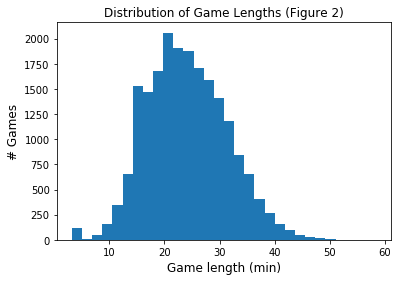

In [98]:
plt.hist(df_results['GameDuration']/60, bins = 30)
plt.xlabel('Game length (min)', fontsize = 12)
plt.ylabel('# Games', fontsize = 12)
plt.title('Distribution of Game Lengths (Figure 2)')

In [90]:
df_dropped = df_results[df_results['GameDuration'] > 330]

In [92]:
df_dropped.shape[0]

20154

Text(0.5, 1.0, 'Distribution of Game Lengths, remake games dropped (Figure 3)')

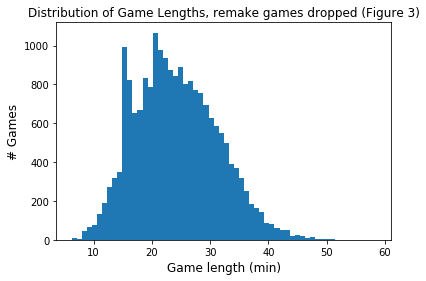

In [96]:
plt.hist(df_dropped['GameDuration']/60, bins = 60)
plt.xlabel('Game length (min)', fontsize = 12)
plt.ylabel('# Games', fontsize = 12)
plt.title('Distribution of Game Lengths, remake games dropped (Figure 3)')

The histogram was re-plotted to confirm that the data dropping was successful.

#### Initial look at post-game dataframe

In [243]:
df_dropped

GameDuration Winner firstTower firstInhibitor firstDragon  \
3411673088          1195    red        red            red         red   
3435528193          1516   blue       blue            red         NaN   
3447586821          1964   blue        red            red         red   
3426877449           915    red        red            NaN         red   
3419144205          1176    red        red            red         red   
...                  ...    ...        ...            ...         ...   
3444742545          1326    red        red            red         red   
3424164242          1915   blue       blue           blue        blue   
3405814162          1208    red        red            red        blue   
3419838867          1305   blue       blue           blue        blue   
3447495054          1658    red        red            red         red   

           firstRiftHerald  baronKillsdiff  riftHeraldKillsdiff  \
3411673088            blue               0                    1   
3435528193             NaN               0                    0   
3447586821             NaN               1                    0   
3426877449             red               0                   -1   
3419144205            blue               0                    0   
...                    ...             ...                  ...   
3444742545             red              -1                   -1   
3424164242            blue               1                    1   
3405814162            blue               0                    0   
3419838867            blue               0                    2   
3447495054            blue               0                    2   

            dragonKillsdiff  FIRE_DRAGONdiff  EARTH_DRAGONdiff firstBaron  \
3411673088               -2             -1.0              -1.0        NaN   
3435528193                0              NaN               NaN        NaN   
3447586821               -3             -2.0              -1.0       blue   
3426877449               -2              NaN              -1.0        NaN   
3419144205               -2             -1.0               NaN        NaN   
...                     ...              ...               ...        ...   
3444742545               -3             -1.0              -1.0        red   
3424164242                1              NaN               1.0       blue   
3405814162               -1              1.0              -1.0        NaN   
3419838867                3              1.0               1.0        NaN   
3447495054               -2              NaN              -1.0        NaN   

           FIRE_DRAGONSoul  AIR_DRAGONdiff  ELDER_DRAGONdiff  \
3411673088             NaN             NaN               NaN   
3435528193             NaN             NaN               NaN   
3447586821             red            -1.0               1.0   
3426877449             NaN             NaN               NaN   
3419144205             NaN             NaN               NaN   
...                    ...             ...               ...   
3444742545             NaN            -1.0               NaN   
3424164242             NaN             1.0               NaN   
3405814162             NaN             NaN               NaN   
3419838867             NaN             NaN               NaN   
3447495054             NaN             NaN               NaN   

            WATER_DRAGONdiff EARTH_DRAGONSoul WATER_DRAGONSoul AIR_DRAGONSoul  
3411673088               NaN              NaN              NaN            NaN  
3435528193               NaN              NaN              NaN            NaN  
3447586821               NaN              NaN              NaN            NaN  
3426877449              -1.0              NaN              NaN            NaN  
3419144205              -1.0              NaN              NaN            NaN  
...                      ...              ...              ...            ...  
3444742545               NaN              NaN              NaN            Na

<function matplotlib.pyplot.show(*args, **kw)>

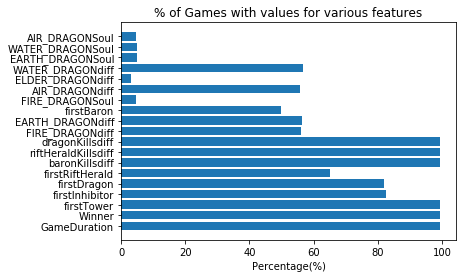

In [251]:
plt.barh(df_dropped.columns, df_dropped.count()/df_results.shape[0]*100)
plt.title('% of Games with values for various features')
plt.xlabel('Percentage(%)')
plt.show

In [247]:
df_dropped.count()/df_results.shape[0]*100

GameDuration           99.403206
Winner                 99.403206
firstTower             99.344020
firstInhibitor         82.688039
firstDragon            81.908755
firstRiftHerald        65.045623
baronKillsdiff         99.403206
riftHeraldKillsdiff    99.403206
dragonKillsdiff        99.403206
FIRE_DRAGONdiff        56.182491
EARTH_DRAGONdiff       56.478422
firstBaron             49.864365
FIRE_DRAGONSoul         4.779285
AIR_DRAGONdiff         55.901356
ELDER_DRAGONdiff        3.067818
WATER_DRAGONdiff       56.769420
EARTH_DRAGONSoul        5.040691
WATER_DRAGONSoul        5.040691
AIR_DRAGONSoul          4.739827
dtype: float64

In [48]:
#summarize in df
tot_games = df.shape[0] #total num of games
num_games_by_time_df = pd.DataFrame(index=[str(str(x)+' min') for x in list_time_dicts.keys()], columns=['Games', 'Games with obj events'])
for time in list_time_dicts.keys():
    num_games_by_time_df['Games'][str(str(time)+' min')] = len(list_time_dicts[time])
    num_games_by_time_df['Games with obj events'][str(str(time)+' min')] = (p.count_dictvals_above_thres(list_time_dicts[time].values()))
    
    #make column of proportions
    num_games_by_time_df['% Games Remaining'] = num_games_by_time_df['Games']/tot_games*100

In [88]:
num_games_by_time_df['% of remaining games with obj events'] = num_games_by_time_df['Games with obj events']/num_games_by_time_df['Games']*100

In [118]:
num_games_by_time_df['% of remaining games without obj events'] = (1-(num_games_by_time_df['% of remaining games with obj events']/100))*100

#### Prevalence of objectives by 5 min intervals

The objective event includes non-neutral objectives, and so any turrets, inhibitors, dragons, etc will count towards this score. 
No objectives are taken within the first 5 minutes, which is to be expected based on game design. The first neutral objective spawns at 5:00, and turrets might be damaged but are designed to be practically impossible to destroy during the first 5 minutes. By 15:00, however, the vast majority (>90%) of games will have had at least one objective event.

In [119]:
num_games_by_time_df

Games Games with obj events % Games Remaining  \
5 min   20156                     0            100.78   
10 min  20012                 11542            100.06   
15 min  18641                 15571            93.205   
20 min  14060                 12634              70.3   
25 min   8722                  8340             43.61   
30 min   4342                  4274             21.71   
35 min   1474                  1465              7.37   
40 min    370                   370              1.85   
45 min     68                    68              0.34   
50 min     10                    10              0.05   
55 min      2                     2              0.01   

       % of remaining games with obj events  \
5 min                                     0   
10 min                              57.6754   
15 min                              83.5309   
20 min                              89.8578   
25 min                              95.6203   
30 min                              98.4339   
35 min                              99.3894   
40 min                                  100   
45 min                                  100   
50 min                                  100   
55 min                                  100   

       % of remaining games without obj events  
5 min                                      100  
10 min                                 42.3246  
15 min                                 16.4691  
20 min                                 10.1422  
25 min                                 4.37973  
30 min                                  1.5661  
35 min                                0.610583  
40 min                                       0  
45 min                                       0  
50 min                                       0  
55 min                                       0

In [104]:
num_games_by_time_df.iloc[:,:2]

Games Games with obj events
5 min   20156                     0
10 min  20012                 11542
15 min  18641                 15571
20 min  14060                 12634
25 min   8722                  8340
30 min   4342                  4274
35 min   1474                  1465
40 min    370                   370
45 min     68                    68
50 min     10                    10
55 min      2                     2

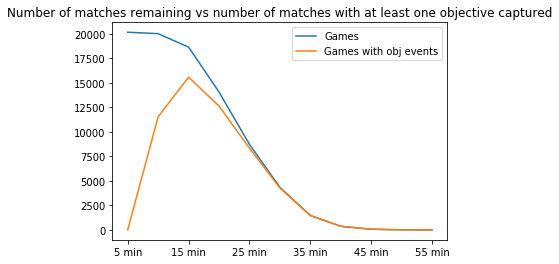

In [109]:
num_games_by_time_df.iloc[:,:2].plot(title='Number of matches remaining vs number of matches with at least one objective captured')

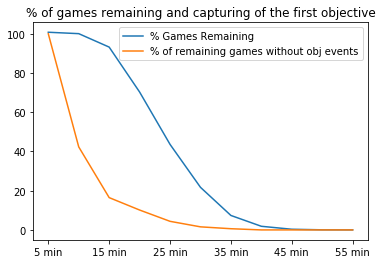

In [123]:
num_games_by_time_df[['% Games Remaining', '% of remaining games without obj events']].plot(title='% of games remaining and capturing of the first objective')

In [165]:
list_time_dicts

{5: {3411673088: {},
  3435528193: {},
  3447586821: {},
  3426877449: {},
  3419144205: {},
  3428843533: {},
  3433824271: {},
  3445751824: {},
  3442737172: {},
  3397648407: {},
  3422683163: {},
  3383099420: {},
  3442868254: {},
  3421372448: {},
  3441557537: {},
  3431858209: {},
  3433168932: {},
  3439329317: {},
  3445358630: {},
  3435135015: {},
  3446931493: {},
  3408527402: {},
  3442999340: {},
  3411935277: {},
  3438280750: {},
  3403677743: {},
  3446931503: {},
  3333816369: {},
  3442429427: {},
  3433693240: {},
  3437625401: {},
  3445882941: {},
  3396337725: {},
  3416391746: {},
  3323854914: {},
  3426091077: {},
  3398041670: {},
  3447586889: {},
  3444572234: {},
  3446276173: {},
  3378643023: {},
  3422814288: {},
  3446145105: {},
  3384934484: {},
  3435790421: {},
  3435528278: {},
  3347578965: {},
  3422552155: {},
  3405119580: {},
  3448766565: {},
  3431858280: {},
  3412197481: {},
  3439198314: {},
  3441950828: {},
  3444834413: {},
  34437

In [25]:
list_time_dicts.keys()

dict_keys([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [29]:
#summarize in df
tot_games = df.shape[0] #total num of games
num_games_by_time_df = pd.DataFrame(index=[str(str(x)+' min') for x in list_time_dicts.keys()], columns=['Games', 'Games with obj events'])
for time in list_time_dicts.keys():
    num_games_by_time_df['Games'][str(str(time)+' min')] = len(list_time_dicts[time])
    num_games_by_time_df['Games with obj events'][str(str(time)+' min')] = p.count_dictvals_above_thres(list_time_dicts[time].values())
    
    #make column of proportions
    num_games_by_time_df['% Games Remaining'] = num_games_by_time_df['Games']/tot_games*100

In [30]:
num_games_by_time_df

Games Games with obj events % Games Remaining
5 min   20156                     0            100.78
10 min  20012                 11542            100.06
15 min  18641                 15571            93.205
20 min  14060                 12634              70.3
25 min   8722                  8340             43.61
30 min   4342                  4274             21.71
35 min   1474                  1465              7.37
40 min    370                   370              1.85
45 min     68                    68              0.34
50 min     10                    10              0.05
55 min      2                     2              0.01

Since there are only 370 games remaining at the time interval of 40, 35 minutes will be the maximum time interval used for modeling. Minute 5 has also been removed since no neutral objectives are available to take at that time. This is reflected in the table as there are no games with any objective events prior to 5 minutes.

Note: the length of a game increases as elo decreases, so more time intervals will likely have to be examined if analysis were to expanded to lower elos.

## Win Distribution

The outcome data feature is a binary feature that currently holds 'red' and 'blue' string values corresponding to the teams. Of the 20,154 games, red won 51.2% and blue won 48.8% of the games. 

In [140]:
df_dropped.Winner.value_counts().values

array([10312,  9842], dtype=int64)

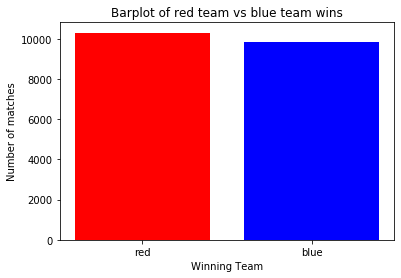

In [144]:
plt.bar(df_dropped.Winner.value_counts().index, 
        df_dropped.Winner.value_counts().values, 
        color=['red', 'blue'])
plt.xlabel('Winning Team')
plt.ylabel("Number of matches")
plt.title('Barplot of red team vs blue team wins')
plt.show()

In [146]:
s_win_ratio = df_dropped.Winner.value_counts()
s_win_perc = s_win_ratio/s_win_ratio.sum()*100
s_win_perc

red     51.166022
blue    48.833978
Name: Winner, dtype: float64

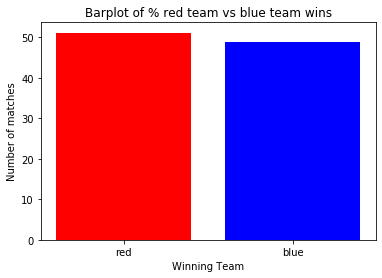

In [148]:
plt.bar(s_win_perc.index, 
        s_win_perc.values, 
        color=['red', 'blue'])
plt.xlabel('Winning Team')
plt.ylabel("Number of matches")
plt.title('Barplot of % red team vs blue team wins')
plt.show()

In [128]:
df_dropped.shape[0] == s_win_ratio.sum()

True

In [126]:
s_win_ratio.sum()

20154

In [149]:
df_times_list = [10, 15, 20, 25, 30, 35]

In [153]:
df_by_time_dict = {}

In [154]:
#build a dataframe for the gamestate of remaining games at 5 minute intervals from 10-35min
#store the dataframes within a dict
for time in df_times_list:
    if len(list_time_dicts[time]) > 1000: #arbitary cutoff number of 1000 games was chosen
        gamestate_by_time_dict[time] = pd.DataFrame(list_time_dicts[time]).transpose()

In [163]:
#build a dataframe for the gamestate of remaining games at 5 minute intervals from 10-35min
#store the dataframes within a dict
for time in df_times_list:
    if len(list_time_dicts[time]) > 1000: #arbitary cutoff number of 1000 games was chosen
        gamestate_by_time_dict[time] = pd.DataFrame(list_time_dicts[time]).transpose()

In [156]:
var_diff = ['baronKillsdiff','riftHeraldKillsdiff', 
                   'dragonKillsdiff', 'FIRE_DRAGONdiff', 'EARTH_DRAGONdiff', 
                   'AIR_DRAGONdiff', 'ELDER_DRAGONdiff', 'WATER_DRAGONdiff']
var_team = ['firstTower', 'firstInhibitor',
       'firstDragon', 'firstRiftHerald', 'firstBaron', 'FIRE_DRAGONSoul', 
              'EARTH_DRAGONSoul', 'WATER_DRAGONSoul', 'AIR_DRAGONSoul']
var_firsts = ['firstTower', 'firstInhibitor',
       'firstDragon', 'firstRiftHerald', 'firstBaron']
var_dragtypediff = ['FIRE_DRAGONdiff', 'EARTH_DRAGONdiff', 
                   'AIR_DRAGONdiff', 'ELDER_DRAGONdiff', 'WATER_DRAGONdiff']
var_soul = ['FIRE_DRAGONSoul', 
              'EARTH_DRAGONSoul', 'WATER_DRAGONSoul', 'AIR_DRAGONSoul']

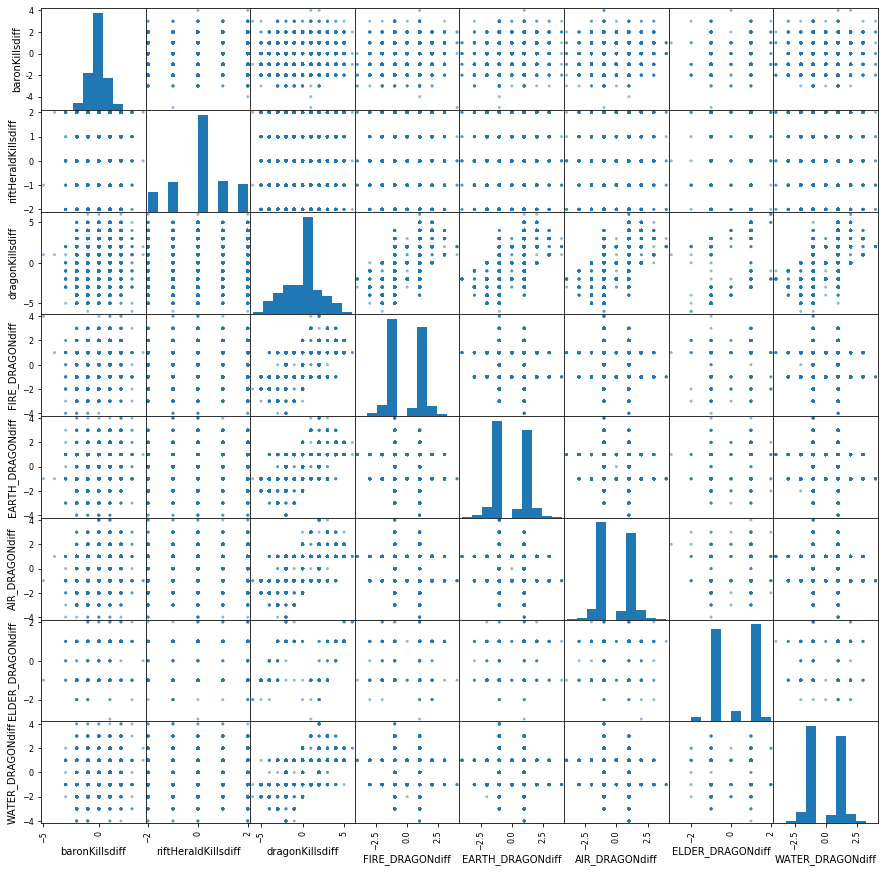

In [158]:
pd.plotting.scatter_matrix(df_clean[var_diff].astype(float), figsize = [15, 15]);

Unsurprisingly, there's a lot of multicollinearity between the variables which means that estimators that assume feature independence wouldn't work well. One obvious relationship is dragon kills difference compared with water dragon kills difference - it follows that killing more water dragons will correlate with more dragon kills as well.

In [160]:
gamestate_by_time_dict.keys()

dict_keys([10, 15, 20, 25, 30, 35, 5])

In [174]:
for col in gamestate_by_time_dict[25]:
    print(gamestate_by_time_dict[25][col].unique())

[nan 'red' 'blue']
[nan -1 1 0.0 -2 2.0 3 -3.0]
[nan -1 2 1.0 0.0 -2.0 -3 -4 3]
[nan -2 1 -1.0 2.0 0.0 3 -3 4]
[nan 'blue' 'red']
[nan -1 1.0 -2 2.0 0.0]
[nan 0 -1.0 1.0 -2.0 2]
[nan -1.0 1.0 2 -2.0 0.0 3 4 -3 -4]
[nan 'blue' 'red']
[nan 'red' 'blue']
[nan 1 -1]


## Encoding and imputing

#### Encoding team values to integers
The numerical integer features indicate differences in objectives between the two teams, with positive numbers indicating a surplus difference for the blue side, and negative integers representing the red side. A value of 0 means that neither team has an advantage in that specific feature over the other team, whether each team has 2 barons or if they each have 0 barons.
The dataframe of post-game stats and all of the time series dataframes needs to be numerically encoded for machine learning. 

The "blue" and "red" strings are used to either indicate match winner or a team that received dragon soul. They are converted to integers 1 and -1, respectively. These integer values and range are selected to match with other objective features. All other values in the soul features are to be encoded to 0, to indicate that a team does not have that dragon soul.

In [214]:
#encoding the post-game df
df_enc = df_dropped.replace({'blue':1, 'red':-1})

In [215]:
df_enc

GameDuration  Winner  firstTower  firstInhibitor  firstDragon  \
3411673088          1195      -1        -1.0            -1.0         -1.0   
3435528193          1516       1         1.0            -1.0          NaN   
3447586821          1964       1        -1.0            -1.0         -1.0   
3426877449           915      -1        -1.0             NaN         -1.0   
3419144205          1176      -1        -1.0            -1.0         -1.0   
...                  ...     ...         ...             ...          ...   
3444742545          1326      -1        -1.0            -1.0         -1.0   
3424164242          1915       1         1.0             1.0          1.0   
3405814162          1208      -1        -1.0            -1.0          1.0   
3419838867          1305       1         1.0             1.0          1.0   
3447495054          1658      -1        -1.0            -1.0         -1.0   

            firstRiftHerald  baronKillsdiff  riftHeraldKillsdiff  \
3411673088              1.0               0                    1   
3435528193              NaN               0                    0   
3447586821              NaN               1                    0   
3426877449             -1.0               0                   -1   
3419144205              1.0               0                    0   
...                     ...             ...                  ...   
3444742545             -1.0              -1                   -1   
3424164242              1.0               1                    1   
3405814162              1.0               0                    0   
3419838867              1.0               0                    2   
3447495054              1.0               0                    2   

            dragonKillsdiff  FIRE_DRAGONdiff  EARTH_DRAGONdiff  firstBaron  \
3411673088               -2             -1.0              -1.0         NaN   
3435528193                0              NaN               NaN         NaN   
3447586821               -3             -2.0              -1.0         1.0   
3426877449               -2              NaN              -1.0         NaN   
3419144205               -2             -1.0               NaN         NaN   
...                     ...              ...               ...         ...   
3444742545               -3             -1.0              -1.0        -1.0   
3424164242                1              NaN               1.0         1.0   
3405814162               -1              1.0              -1.0         NaN   
3419838867                3              1.0               1.0         NaN   
3447495054               -2              NaN              -1.0         NaN   

            FIRE_DRAGONSoul  AIR_DRAGONdiff  ELDER_DRAGONdiff  \
3411673088              NaN             NaN               NaN   
3435528193              NaN             NaN               NaN   
3447586821             -1.0            -1.0               1.0   
3426877449              NaN             NaN               NaN   
3419144205              NaN             NaN               NaN   
...                     ...             ...               ...   
3444742545              NaN            -1.0               NaN   
3424164242              NaN             1.0               NaN   
3405814162              NaN             NaN               NaN   
3419838867              NaN             NaN               NaN   
3447495054              NaN             NaN               NaN   

            WATER_DRAGONdiff  EARTH_DRAGONSoul  WATER_DRAGONSoul  \
3411673088               NaN               NaN               NaN   
3435528193               NaN               NaN               NaN   
3447586821               NaN               NaN               NaN   
3426877449              -1.0               NaN               NaN   
3419144205              -1.0               NaN               NaN   
...                      ...               ...               ...   
3444742545               NaN               NaN               NaN   
34241642

In [184]:
for col in gamestate_by_time_dict[10]:
    print(gamestate_by_time_dict[10][col].unique())

[nan -1.  1.]
[nan -1.  1.]
[nan -1.  1.]
[nan  0.]
[nan -1.  1.]
[nan -1.  1.]


In [185]:
gamestate_by_time_dict[10].columns

Index(['AIR_DRAGONdiff', 'WATER_DRAGONdiff', 'RIFTHERALDdiff',
       'BARON_NASHORdiff', 'FIRE_DRAGONdiff', 'EARTH_DRAGONdiff'],
      dtype='object')

In [191]:
gamestate_by_time_dict[10].iloc[:,0]

3411673088    NaN
3435528193    NaN
3447586821   -1.0
3426877449    NaN
3419144205    NaN
             ... 
3444742545    NaN
3424164242    NaN
3405814162    NaN
3419838867    NaN
3447495054    NaN
Name: AIR_DRAGONdiff, Length: 20012, dtype: float64

In [210]:
#convert blue and red team to boolean ints

enc_gamestate_by_time_dict = {}

for time in gamestate_by_time_dict.keys():
    if gamestate_by_time_dict[time].dtypes.any() == 'object':
        enc_gamestate_by_time_dict[time] = gamestate_by_time_dict[time].replace({'blue': 1, 'red': -1})
    else:
        enc_gamestate_by_time_dict[time] = gamestate_by_time_dict[time]

In [211]:
enc_gamestate_by_time_dict.keys()

dict_keys([10, 15, 20, 25, 30, 35, 5])

In [207]:
for col in enc_gamestate_by_time_dict[25]:
    print(enc_gamestate_by_time_dict[25][col].unique())

[nan -1.  1.]
[nan -1.  1.  0. -2.  2.  3. -3.]
[nan -1.  2.  1.  0. -2. -3. -4.  3.]
[nan -2.  1. -1.  2.  0.  3. -3.  4.]
[nan  1. -1.]
[nan -1.  1. -2.  2.  0.]
[nan  0. -1.  1. -2.  2.]
[nan -1.  1.  2. -2.  0.  3.  4. -3. -4.]
[nan  1. -1.]
[nan -1.  1.]
[nan  1. -1.]


#### Imputing with means
For this dataset, the NaN values aren't true missing values; they're placeholders for 0. The game data only records when a team captures an objective, otherwise the absence of a value means that a team has not captured that objective. However, imputing the mean seems most prudent in order to distinguish between 0 values resulting from the sum of non-zero values and 0 values where both teams have not obtained the objective.

In [217]:
#if I wanted to fill with 0:
#df_enc.fillna(0)

df_filled = df_enc.fillna(df_enc.mean())

In [218]:
filled_gamestate_by_time_dict = {}
#convert blue and red team to boolean ints
for time in enc_gamestate_by_time_dict.keys():
    filled_gamestate_by_time_dict[time] = enc_gamestate_by_time_dict[time].fillna(enc_gamestate_by_time_dict[time].mean())

In [219]:
filled_gamestate_by_time_dict[10]

AIR_DRAGONdiff  WATER_DRAGONdiff  RIFTHERALDdiff  \
3411673088       -0.078523         -0.037923        0.080762   
3435528193       -0.078523         -0.037923        0.080762   
3447586821       -1.000000         -0.037923        0.080762   
3426877449       -0.078523         -1.000000       -1.000000   
3419144205       -0.078523         -0.037923        0.080762   
...                    ...               ...             ...   
3444742545       -0.078523         -0.037923        0.080762   
3424164242       -0.078523         -0.037923        0.080762   
3405814162       -0.078523         -0.037923        0.080762   
3419838867       -0.078523         -0.037923        0.080762   
3447495054       -0.078523         -0.037923        1.000000   

            BARON_NASHORdiff  FIRE_DRAGONdiff  EARTH_DRAGONdiff  
3411673088               0.0        -0.047194         -0.022106  
3435528193               0.0        -0.047194         -0.022106  
3447586821               0.0        -0.047194         -0.022106  
3426877449               0.0        -0.047194         -0.022106  
3419144205               0.0        -1.000000         -0.022106  
...                      ...              ...               ...  
3444742545               0.0        -1.000000         -0.022106  
3424164242               0.0        -0.047194          1.000000  
3405814162               0.0         1.000000         -0.022106  
3419838867               0.0        -0.047194          1.000000  
3447495054               0.0        -0.047194         -0.022106  

[20012 rows x 6 columns]

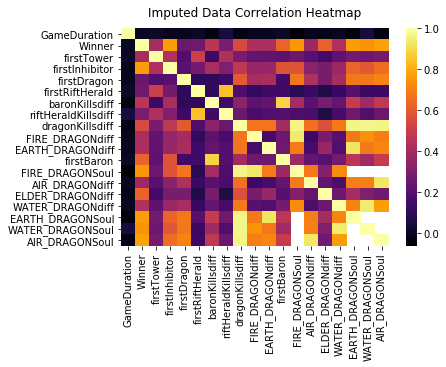

In [228]:
enc_corr_heatmap = sns.heatmap(df_enc.corr(), cmap = 'inferno')
enc_corr_heatmap.set_title('Imputed Data Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

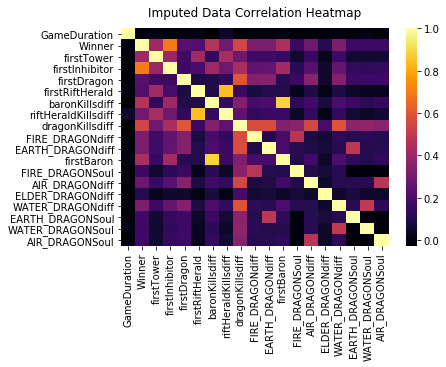

In [227]:
filled_corr_heatmap = sns.heatmap(df_filled.corr(), cmap = 'inferno')
filled_corr_heatmap.set_title('Imputed Data Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [164]:
enc_gamestate_by_time_dict[10]['Winner']

3411673088   -1
3435528193    1
3447586821    1
3426877449   -1
3419144205   -1
             ..
3444742545   -1
3424164242    1
3405814162   -1
3419838867    1
3447495054   -1
Name: Winner, Length: 20012, dtype: int64

In [168]:
df_ini_timecorr = pd.DataFrame()
for time in enc_gamestate_by_time_dict.keys():
    s_corr = pd.Series(enc_gamestate_by_time_dict[time].corrwith(enc_gamestate_by_time_dict[time]['Winner']).drop('Winner'), name=time)
    df_ini_timecorr = pd.concat((df_ini_timecorr, s_corr), axis=1)

In [169]:
df_ini_timecorr

10        15        20        25        30  \
AIR_DRAGONdiff        0.191492  0.243416  0.264763  0.233516  0.185378   
WATER_DRAGONdiff      0.316650  0.321824  0.325857  0.290281  0.234705   
RIFTHERALDdiff        0.189807  0.231883  0.286865  0.208725  0.107054   
BARON_NASHORdiff           NaN  0.062523  0.051695  0.350548  0.340814   
FIRE_DRAGONdiff       0.278077  0.286979  0.291128  0.279099  0.215613   
EARTH_DRAGONdiff      0.260551  0.300264  0.319744  0.280518  0.247665   
FIRE_DRAGONSoulteam        NaN  1.000000  0.651711  0.725939  0.665715   
AIR_DRAGONSoulteam         NaN  0.577350  0.874957  0.767002  0.673871   
WATER_DRAGONSoulteam       NaN       NaN  0.700551  0.755725  0.717088   
EARTH_DRAGONSoulteam       NaN       NaN  0.594028  0.849271  0.693035   
ELDER_DRAGONdiff           NaN       NaN       NaN -0.200446  0.621034   

                            35  
AIR_DRAGONdiff        0.134505  
WATER_DRAGONdiff      0.178456  
RIFTHERALDdiff        0.022551  
BARON_NASHORdiff      0.224869  
FIRE_DRAGONdiff       0.181457  
EARTH_DRAGONdiff      0.201333  
FIRE_DRAGONSoulteam   0.540347  
AIR_DRAGONSoulteam    0.440671  
WATER_DRAGONSoulteam  0.488462  
EARTH_DRAGONSoulteam  0.605013  
ELDER_DRAGONdiff      0.274710

Text(0.5, 15.0, 'Match time (min)')

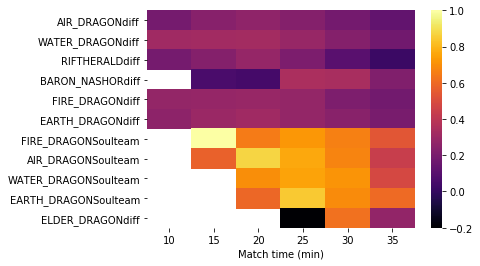

In [176]:
ax = sns.heatmap(df_ini_timecorr, cmap = 'inferno')
ax.set_xlabel('Match time (min)')

Heatmap of correlation of the features with the match winner, for each time interval. Very interesting how high the correlations are for dragon souls with the winner. Infernal soul actually has a correlation coefficient of 1 at 15 minutes. The souls' association with the winning team decreases past 30 minutes, but is still fairly strongly associated with winning with coefficients between 0.44 and 0.61.

In [923]:
df['firstDragon'].value_counts()

red     8675
blue    7705
Name: firstDragon, dtype: int64

In [236]:
df_dropped['firstDragon'].value_counts()

red     8803
blue    7804
Name: firstDragon, dtype: int64

In [235]:
df_dropped

GameDuration Winner firstTower firstInhibitor firstDragon  \
3411673088          1195    red        red            red         red   
3435528193          1516   blue       blue            red         NaN   
3447586821          1964   blue        red            red         red   
3426877449           915    red        red            NaN         red   
3419144205          1176    red        red            red         red   
...                  ...    ...        ...            ...         ...   
3444742545          1326    red        red            red         red   
3424164242          1915   blue       blue           blue        blue   
3405814162          1208    red        red            red        blue   
3419838867          1305   blue       blue           blue        blue   
3447495054          1658    red        red            red         red   

           firstRiftHerald  baronKillsdiff  riftHeraldKillsdiff  \
3411673088            blue               0                    1   
3435528193             NaN               0                    0   
3447586821             NaN               1                    0   
3426877449             red               0                   -1   
3419144205            blue               0                    0   
...                    ...             ...                  ...   
3444742545             red              -1                   -1   
3424164242            blue               1                    1   
3405814162            blue               0                    0   
3419838867            blue               0                    2   
3447495054            blue               0                    2   

            dragonKillsdiff  FIRE_DRAGONdiff  EARTH_DRAGONdiff firstBaron  \
3411673088               -2             -1.0              -1.0        NaN   
3435528193                0              NaN               NaN        NaN   
3447586821               -3             -2.0              -1.0       blue   
3426877449               -2              NaN              -1.0        NaN   
3419144205               -2             -1.0               NaN        NaN   
...                     ...              ...               ...        ...   
3444742545               -3             -1.0              -1.0        red   
3424164242                1              NaN               1.0       blue   
3405814162               -1              1.0              -1.0        NaN   
3419838867                3              1.0               1.0        NaN   
3447495054               -2              NaN              -1.0        NaN   

           FIRE_DRAGONSoul  AIR_DRAGONdiff  ELDER_DRAGONdiff  \
3411673088             NaN             NaN               NaN   
3435528193             NaN             NaN               NaN   
3447586821             red            -1.0               1.0   
3426877449             NaN             NaN               NaN   
3419144205             NaN             NaN               NaN   
...                    ...             ...               ...   
3444742545             NaN            -1.0               NaN   
3424164242             NaN             1.0               NaN   
3405814162             NaN             NaN               NaN   
3419838867             NaN             NaN               NaN   
3447495054             NaN             NaN               NaN   

            WATER_DRAGONdiff EARTH_DRAGONSoul WATER_DRAGONSoul AIR_DRAGONSoul  
3411673088               NaN              NaN              NaN            NaN  
3435528193               NaN              NaN              NaN            NaN  
3447586821               NaN              NaN              NaN            NaN  
3426877449              -1.0              NaN              NaN            NaN  
3419144205              -1.0              NaN              NaN            NaN  
...                      ...              ...              ...            ...  
3444742545               NaN              NaN              NaN            Na

<a id = 'model'> </a>
# Revised Model

My original data had separate sets of features for each team and time features for each objective in an attempt to preserve features. As I found no significant difference in maintaining separate team features, I chose to combine the separate team features for ease of results interpretation. For the revised data and model. I combined the teams' metrics by subtracting the red team from the blue team.

Original model can be found in later sections of this notebook.

In [38]:
X = df_filled.drop('Winner', axis=1)

In [39]:
y = df_filled['Winner']

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

#### Model selection

Why ensemble learning classifiers:
- works quickly and efficiently for large datasets
- high accuracy for complex datasets
- however, overfitting happens easily

Model of choice, Gradient Boosting Classifier, uses a loss function and weak learner decision trees. The weak learners are added to each other 

In [330]:
%%time
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('ADA', AdaBoostClassifier()))
models.append(('BAG', BaggingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ADA: 0.891745 (0.006074)
BAG: 0.874975 (0.005032)
RFC: 0.884452 (0.004338)
GBC: 0.899385 (0.004823)
Wall time: 32.4 s


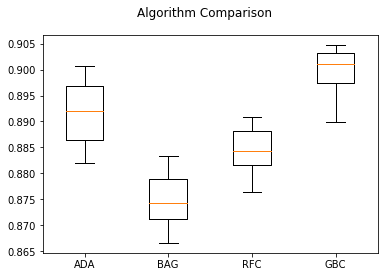

In [331]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Just like with the initial model, GradientBoostingClassifier performed the best amongst the classifers with an accuracy score of 90% and F-score of 0.899.

#### Model tuning

First tried GridSearchCV with small number of parameters, which did not optimize model (and in fact worsened performance slightly). Subsequently used more parameters with RandomSearchCV which produced a slightly improved model.

|                	| Initial Model 	| Optimised Model 	|
|----------------	|---------------	|-----------------	|
| Accuracy Score 	|     0.9044    	| 0.9051          	|
| F-score        	| 0.8994        	| 0.9007          	|

In [65]:
%%time
# Initialize the classifier
clf_GB = GradientBoostingClassifier(random_state = 42)

# Create the parameters list to tune
#parameters = {'n_estimators':[10, 20, 60, 100], 'learning_rate': [0.05, 0.1, 0.2, 1]}

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf_GB, param_grid = parameters, scoring = scorer, cv = 5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_GB.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9044
F-score on testing data: 0.8994

Optimized Model
------
Final accuracy score on the testing data: 0.8857
Final F-score on the testing data: 0.9031


In [69]:
%%time
clf = GradientBoostingClassifier()

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

params = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "friedman_mse"],
                'n_estimators':[10, 20, 60, 100], 
                'learning_rate': [0.05, 0.01, 0.1, 0.2, 1],
                'max_depth': [None, 1, 3, 5, 10]}

'''
#Another set of parameters to use
params = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
'''
random_search = RandomizedSearchCV(clf, param_distributions=params,n_iter=4, scoring=scorer)
random_search.fit(X_train, y_train)


#store optimized clf
best_clf = random_search.best_estimator_

predictions = clf.fit(X_train, y_train).predict(X_test)
best_predictions = best_clf.predict(X_test)
print("Unoptimized model\n------")
print(classification_report(y_test, predictions))
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print(classification_report(y_test, best_predictions))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
              precision    recall  f1-score   support

          -1       0.91      0.90      0.91      3109
           1       0.90      0.91      0.90      2938

    accuracy                           0.90      6047
   macro avg       0.90      0.90      0.90      6047
weighted avg       0.90      0.90      0.90      6047

Accuracy score on testing data: 0.9044
F-score on testing data: 0.8994

Optimized Model
------
              precision    recall  f1-score   support

          -1       0.91      0.90      0.91      3109
           1       0.90      0.91      0.90      2938

    accuracy                           0.91      6047
   macro avg       0.90      0.91      0.91      6047
weighted avg       0.91      0.91      0.91      6047

Final accuracy score on the testing data: 0.9051
Final F-score on the testing data: 0.9007
Wall time: 10.8 s


In [180]:
def train_time_series():
    '''
    Trains estimator to predict match winner based on data of captured neutral objectives up to set time intervals.
    Outputs performance metrics,Fbeta_score and accuracy score, and feature importances.
    
    '''
    feat_imp_by_time_df = pd.DataFrame()
    scores_by_time_df = pd.DataFrame(index=[x for x in filled_gamestate_by_time_dict.keys()], 
                                     columns=['F-score', 'Accuracy'])
    for time in list(filled_gamestate_by_time_dict.keys()):
        X = filled_gamestate_by_time_dict[time].drop('Winner', axis=1)
        y = filled_gamestate_by_time_dict[time]['Winner']
        X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
        best_clf.fit(X_train, y_train)
        y_preds = best_clf.predict(X_test)
        
        s_feat_imp = pd.Series(best_clf.feature_importances_, index=X.columns.values, name=time).sort_values(ascending=False)
        feat_imp_by_time_df = pd.concat((feat_imp_by_time_df, s_feat_imp), axis=1)
        
        scores_by_time_df['F-score'][time] = fbeta_score(y_test, y_preds, beta = 0.5)
        scores_by_time_df['Accuracy'][time] = accuracy_score(y_test, y_preds)

    return feat_imp_by_time_df, scores_by_time_df.astype(float)

In [178]:
%%time
feat_imp_by_time_df, scores_by_time_df = train_time_series()

Wall time: 3.76 s


In [120]:
feat_imp_by_time_df

10        15        20        25        30  \
WATER_DRAGONdiff      0.299001  0.203074  0.211798  0.140192  0.116853   
FIRE_DRAGONdiff       0.274889  0.189322  0.162145  0.149741  0.143867   
EARTH_DRAGONdiff      0.217706  0.201837  0.203155  0.161219  0.129570   
AIR_DRAGONdiff        0.130932  0.135262  0.130543  0.107321  0.115742   
RIFTHERALDdiff        0.077472  0.221196  0.252760  0.134774  0.118129   
BARON_NASHORdiff      0.000000  0.047827  0.031107  0.283870  0.300873   
AIR_DRAGONSoulteam         NaN  0.000860  0.002792  0.006717  0.019206   
FIRE_DRAGONSoulteam        NaN  0.000621  0.002530  0.005143  0.012605   
ELDER_DRAGONdiff           NaN  0.000000  0.000000  0.001764  0.011231   
EARTH_DRAGONSoulteam       NaN  0.000000  0.001565  0.004658  0.012433   
WATER_DRAGONSoulteam       NaN  0.000000  0.001605  0.004603  0.019491   

                            35  
WATER_DRAGONdiff      0.097120  
FIRE_DRAGONdiff       0.099195  
EARTH_DRAGONdiff      0.135436  
AIR_DRAGONdiff        0.111016  
RIFTHERALDdiff        0.143125  
BARON_NASHORdiff      0.214265  
AIR_DRAGONSoulteam    0.025089  
FIRE_DRAGONSoulteam   0.053519  
ELDER_DRAGONdiff      0.042576  
EARTH_DRAGONSoulteam  0.032578  
WATER_DRAGONSoulteam  0.046080

In [179]:
scores_by_time_df

F-score  Accuracy
10  0.532248  0.580446
15  0.613754  0.630252
20  0.679688  0.675913
25  0.710488  0.705388
30  0.696319  0.698388
35  0.705394  0.665914

Text(0.5, 1.0, 'Predicting wins based on cumulative objectives discrepancies at different time intervals')

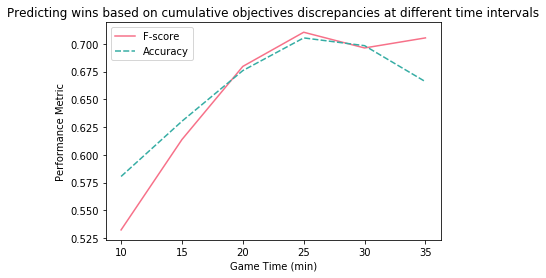

In [186]:
ax = sns.lineplot(data=scores_by_time_df, palette="husl")

ax.set_ylabel("Performance Metric")
ax.set_xlabel("Game Time (min)")
plt.title('Predicting wins based on cumulative objectives discrepancies at different time intervals')
#plt.tight_layout(h_pad=2)

As to be expected, prediction accuracy is little better than random during early game when very few objectives are available to be taken, and thus less data available to base predictions upon. As teams capture more objectives throughout the game, the accuracy increases to a maximum of 70.5% at 25 mins and declines thereafter. The decline is also expected since the advantages granted by neutral objectives slowly evens out: the disadvantaged team can use the time in a stalled game to catch up in resources (gold), while gold differences matters less and less as players max out their resource slots.

In [59]:
clf_preset = GradientBoostingClassifier()
saved_params = {'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [60]:
clf_preset.set_params(**saved_params)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [365]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Feature importances

In [397]:
var_diff = ['baronKillsdiff','riftHeraldKillsdiff', 
                   'dragonKillsdiff', 'FIRE_DRAGONdiff', 'EARTH_DRAGONdiff', 
                   'AIR_DRAGONdiff', 'ELDER_DRAGONdiff', 'WATER_DRAGONdiff']
var_team = ['firstTower', 'firstInhibitor',
       'firstDragon', 'firstRiftHerald', 'firstBaron', 'FIRE_DRAGONSoul', 
              'EARTH_DRAGONSoul', 'WATER_DRAGONSoul', 'AIR_DRAGONSoul']
var_firsts = ['firstTower', 'firstInhibitor',
       'firstDragon', 'firstRiftHerald', 'firstBaron']
var_dragtypediff = ['FIRE_DRAGONdiff', 'EARTH_DRAGONdiff', 
                   'AIR_DRAGONdiff', 'ELDER_DRAGONdiff', 'WATER_DRAGONdiff']
var_soul = ['FIRE_DRAGONSoul', 
              'EARTH_DRAGONSoul', 'WATER_DRAGONSoul', 'AIR_DRAGONSoul']

In [368]:
feat_importances = pd.Series(best_clf.feature_importances_, index=X_test.columns.values).sort_values(ascending=False)

In [369]:
feat_importances

firstInhibitor         0.428574
dragonKillsdiff        0.194438
GameDuration           0.100819
baronKillsdiff         0.082527
firstBaron             0.035316
firstTower             0.035183
riftHeraldKillsdiff    0.018968
FIRE_DRAGONdiff        0.016897
firstDragon            0.015536
EARTH_DRAGONdiff       0.014207
AIR_DRAGONdiff         0.013353
WATER_DRAGONdiff       0.013240
firstRiftHerald        0.012784
ELDER_DRAGONdiff       0.007782
FIRE_DRAGONSoul        0.002904
AIR_DRAGONSoul         0.002528
EARTH_DRAGONSoul       0.002499
WATER_DRAGONSoul       0.002447
dtype: float64

In [ ]:
def plot_barh(s_to_plot, title = '', xlabel = '', ylabel = '',
color_palette = 'YlGnBu', pre_unit = '', suff_unit = '', round_place = 4,
              xllim_set = 0, xulim_set = 1, size=(12, 8)):

    y_labels = s_to_plot.index

    # Plot the figure.
    plt.figure(figsize=size)
    ax = s_to_plot.plot(kind='barh')
    plt.barh(s_to_plot.index, s_to_plot,
            color = sns.color_palette(color_palette, len(s_to_plot.index)))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_yticklabels(y_labels)
    #x_llim, x_ulim = ax.get_xlim()
    #x_ulim = xulim_set
    ax.set_xlim(xllim_set, xulim_set) # expand xlim to make labels easier to read
    plt.tight_layout()
    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        label_string = "{:."+str(round_place)+"f}"
        # Use X value as label and format number with a defined number of decimal places
        #label = "{:.1f}".format(x_value)
        label = label_string.format(x_value)

        # Create annotation
        plt.annotate(
            pre_unit+label+suff_unit,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                      # Horizontally align label differently for
                                        # positive and negative values.

<a id = 'results'></a>

# Results

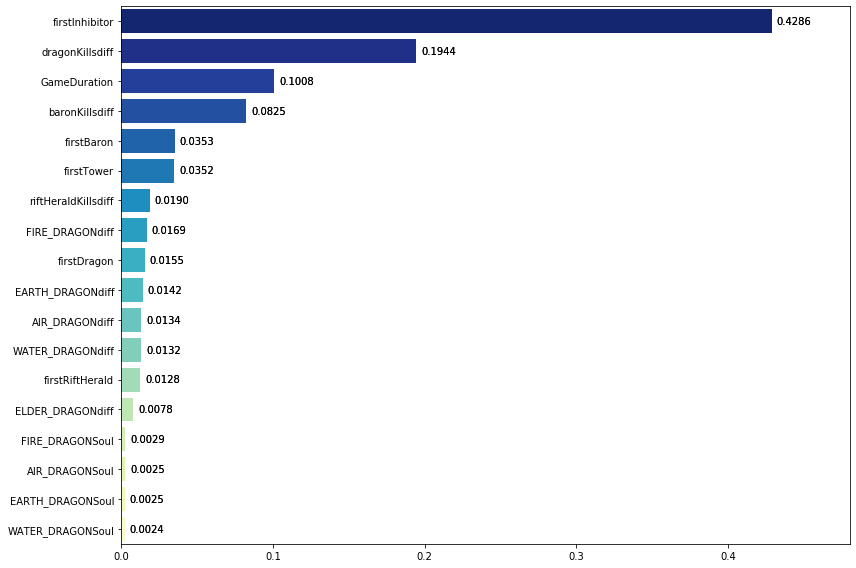

In [410]:
v.plot_barh(feat_importances.sort_values(ascending=True), xulim_set=0.48, round_place=4)

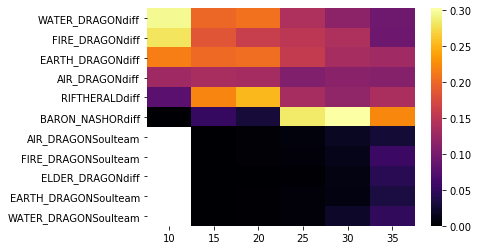

In [158]:
sns.heatmap(feat_imp_by_time_df, cmap = 'inferno')

# Results Summary

Although this project is unable to establish causal relationships, it identified interesting relationships between different types of neutral objectives, game time, and the winning team:
- among the "firsts" in objectives, first inhibitor is most predictive of the winner followed by first baron and first tower very closely together.

The top 5 most post-game predictive features are:
1. team that takes first inhibitor
2. elemental dragons difference
3. game duration
4. baron kill difference
5. team that takes first baron / team that takes first tower






### Early objectives

Of all the early objectives available (inhibitor, tower, dragon, baron, rift herald), the order of their importances are. 

#### First inhibitor > First baron > First tower > First dragon > First rift herald

Of course, the associations here must be taken with a grain of salt before tranlating them to causation - other than First Inhibitor, the differences in weights between the objectives are not big. Having early game pressure will translate to more objective control. However, it is very telling that first dragon has more weight than first herald, when both of these objectives are usually captured around the same time and are often "traded" for each other (if one team takes one, the other team will take the other).

Different types of objectives seem to be the most valuable (associated with winning) at different points in the game:
- 10 mins: **elemental dragon differences**, in order of Ocean > Infernal > Mountain > Cloud. 
    - While this may suggest that the order is related to the degree of advantage the dragon bestows on a team, it's just as possible that the order reflects prioritization of the dragon types. For example, the ocean dragons are regarded as beneficial for early laning phases, so advantaged team may expend more effort securing the dragon than for a cloud dragon.
    - considering the priority that teams place on dragons right now as a stepping stone to obtaining dragon soul, the weakness of the individual dragons, and the fact that the soul drake element is not reveal until after the 2nd dragon is killed, it seems likely that the weight differences here stem from the degree of advantages conferred by different types of dragons.
- 15-20 mins: **rift herald difference** - if the rift herald is captured early enough, it will spawn a second time as a stronger buff. The rift herald will despawn at 20 minutes if not killed, so the window of most significance during 15 and 20 minutes reflects this nicely. The 20 minute association is stronger than the 15 minute one in accordance with the rift herald's strength.
- 25-35 mins: **Baron nashor difference** at 35 mins, soul dragons and elder dragons become more significant, but their effects are still overshadowed by literally every other objective. 

### Elemental Dragons
It seems that elemental dragon advantages - those found in early game - are much more significantly associated with wins than souls. Certainly part of the reason for the association may be the translation of early game advantages, obtained from outside of neutral objectives (e.g. lane dominance, successful skirmishes), into capturing neutral objectives. There is still the logical possibility of a causal relationship. 

Individiual elemental dragons might be weak (and they are far weaker than in previous seasons), but they are far more significantly related to wins than the objectively stronger elder dragons and dragon souls. The small advantages conferred by individual drakes in the early game might help teams dominate over the enemy team and snowball further advantages.
To better establish a causal relationship, Assessing how teams prioritize between the different objectives would be useful to establish a causal relationship. The relatively small importances that souls have towards wins compared to the initial direct correlation might be that by the time these late-game objectives are available, wins are already decided by early game snowballing.

# Future work/directions:
- adding predictions based on different points of time in the game
- adding lane positions to assess their impact on objective control
- try fitting a XGBoost Classifier model, a variation of the Gradient Boosting Classifier used for the project
- add other relevant match variables: team gold, kills, wards, champion picks, etc.
- expand number of matches in dataset - due to time practicality limitations, only 20,000 matches were extracted of over 60,000 match IDs obtained
- expand data to servers in other geographical regions - e.g. EU, China, Korean
- expand data to lower elos, since masters+ is a very small proportion of the playerbase and may not reflect what the predictors are in lower elo (e.g. Bronze, Silver, Gold)
- evaluate competitive play, which plays out differently than solo queue, and where objective decisions matter more than anywhere else

---
---
---

take out all time vars

In [17]:
match_stats_dict

{3411673088: {'GameDuration': 1195,
  'Winner': 'red',
  'FIRE_DRAGONdiff': -1,
  'EARTH_DRAGONdiff': -1,
  'RIFTHERALDdiff': 1,
  'BARON_NASHORdiff': 0},
 3435528193: {'GameDuration': 1516, 'Winner': 'blue'},
 3447586821: {'GameDuration': 1964,
  'Winner': 'blue',
  'FIRE_DRAGONSoulteam': 'red',
  'AIR_DRAGONdiff': -1,
  'EARTH_DRAGONdiff': -1,
  'FIRE_DRAGONdiff': -2,
  'ELDER_DRAGONdiff': 1,
  'RIFTHERALDdiff': 0,
  'BARON_NASHORdiff': 1},
 3426877449: {'GameDuration': 915,
  'Winner': 'red',
  'WATER_DRAGONdiff': -1,
  'EARTH_DRAGONdiff': -1,
  'RIFTHERALDdiff': -1,
  'BARON_NASHORdiff': 0},
 3419144205: {'GameDuration': 1176,
  'Winner': 'red',
  'FIRE_DRAGONdiff': -1,
  'WATER_DRAGONdiff': -1,
  'RIFTHERALDdiff': 0,
  'BARON_NASHORdiff': 0},
 3428843533: {'GameDuration': 758,
  'Winner': 'red',
  'WATER_DRAGONdiff': -1,
  'EARTH_DRAGONdiff': -1},
 3433824271: {'GameDuration': 1154,
  'Winner': 'blue',
  'FIRE_DRAGONdiff': 1,
  'WATER_DRAGONdiff': -1,
  'AIR_DRAGONdiff': 0,
  'RIF

In [996]:
match_timeline_dict[gameId].keys()

dict_keys(['frames', 'frameInterval'])

In [709]:
#convert dict into df with one game per row
df = pd.DataFrame(match_stats_dict3).transpose()

In [806]:
var_soul = ['FIRE_DRAGONSoulteam', 'FIRE_DRAGONSoultime',
            'WATER_DRAGONSoulteam', 'WATER_DRAGONSoultime',
           'AIR_DRAGONSoulteam', 'AIR_DRAGONSoultime',
           'EARTH_DRAGONSoulteam', 'EARTH_DRAGONSoultime']
var_soul_team = ['FIRE_DRAGONSoulteam', 
            'WATER_DRAGONSoulteam', 
           'AIR_DRAGONSoulteam', 
           'EARTH_DRAGONSoulteam']
var_soul_time = ['FIRE_DRAGONSoultime',
'WATER_DRAGONSoultime',
'AIR_DRAGONSoultime',
'EARTH_DRAGONSoultime']

In [847]:
for var in var_soul_team:
    print (df[var].value_counts())

red     518
blue    433
Name: FIRE_DRAGONSoulteam, dtype: int64
red     539
blue    468
Name: WATER_DRAGONSoulteam, dtype: int64
red     521
blue    423
Name: AIR_DRAGONSoulteam, dtype: int64
red     541
blue    461
Name: EARTH_DRAGONSoulteam, dtype: int64


In [859]:
df[var_soul_team]

FIRE_DRAGONSoulteam WATER_DRAGONSoulteam AIR_DRAGONSoulteam  \
3411673088                 NaN                  NaN                NaN   
3435528193                 NaN                  NaN                NaN   
3447586821                 red                  NaN                NaN   
3426877449                 NaN                  NaN                NaN   
3419144205                 NaN                  NaN                NaN   
...                        ...                  ...                ...   
3436877728                 NaN                  NaN                NaN   
3422984098                 NaN                  NaN                NaN   
3342243749                 NaN                  NaN                NaN   
3448805286                 NaN                  NaN                NaN   
3427833767                 NaN                  NaN                NaN   

           EARTH_DRAGONSoulteam  
3411673088                  NaN  
3435528193                  NaN  
3447586821                  NaN  
3426877449                  NaN  
3419144205                  NaN  
...                         ...  
3436877728                  NaN  
3422984098                  NaN  
3342243749                  NaN  
3448805286                  NaN  
3427833767                  NaN  

[20000 rows x 4 columns]

In [895]:
#create new var of which team obtained dragon soul
s = df[var_soul_team[0]]
for var in var_soul_team[1:]:
    s = s.replace(np.nan, '').astype(str).add(df[var].replace(np.nan, '').astype(str))

In [904]:
df['soul_team'] = s.replace({'':np.nan})

In [907]:
df['GameDuration'].max()

3507

In [905]:
df

GameDuration Winner firstTower firstInhibitor firstDragon  \
3411673088         1195    red        red            red         red   
3435528193         1516   blue       blue            red         NaN   
3447586821         1964   blue        red            red         red   
3426877449          915    red        red            NaN         red   
3419144205         1176    red        red            red         red   
...                 ...    ...        ...            ...         ...   
3436877728         2184    red        red            red         red   
3422984098         1112   blue       blue           blue         red   
3342243749         1880    red       blue            red        blue   
3448805286         1105    red        red            NaN         red   
3427833767          896   blue       blue           blue        blue   

           firstRiftHerald bluebaronKills redbaronKills blueriftHeraldKills  \
3411673088            blue              0             0                   1   
3435528193             NaN              0             0                   0   
3447586821             NaN              1             0                   0   
3426877449             red              0             0                   0   
3419144205            blue              0             0                   1   
...                    ...            ...           ...                 ...   
3436877728             red              0             2                   0   
3422984098            blue              0             0                   1   
3342243749            blue              0             1                   1   
3448805286            blue              0             0                   1   
3427833767             NaN              0             0                   0   

           redriftHeraldKills  ... 2ELDER_DRAGONtime 7AIR_DRAGONteam  \
3411673088                  0  ...               NaN             NaN   
3435528193                  0  ...               NaN             NaN   
3447586821                  0  ...               NaN             NaN   
3426877449                  1  ...               NaN             NaN   
3419144205                  1  ...               NaN             NaN   
...                       ...  ...               ...             ...   
3436877728                  1  ...               NaN             NaN   
3422984098                  0  ...               NaN             NaN   
3342243749                  1  ...               NaN             NaN   
3448805286                  0  ...               NaN             NaN   
3427833767                  0  ...               NaN             NaN   

           7AIR_DRAGONtime 7WATER_DRAGONteam 7WATER_DRAGONtime  \
3411673088             NaN               NaN               NaN   
3435528193             NaN               NaN               NaN   
3447586821             NaN               NaN               NaN   
3426877449             NaN               NaN               NaN   
3419144205             NaN               NaN               NaN   
...                    ...               ...               ...   
3436877728             NaN               NaN               NaN   
3422984098             NaN               NaN               NaN   
3342243749             NaN               NaN               NaN   
3448805286             NaN               NaN               NaN   
3427833767             NaN               NaN               NaN   

           3ELDER_DRAGONteam 3ELDER_DRAGONtime BARON_NASHOR5team  \
3411673088               NaN               NaN               NaN   
3435528193               NaN               NaN               NaN   
3447586821               NaN               NaN               NaN   
3426877449               NaN               NaN               NaN   
3419144205               NaN               NaN               NaN   
...                      ...               ...               ...   
3436877728               NaN               NaN               Na

In [428]:
match_stats = {}

In [713]:
df_clean = df[df['GameDuration'] > 300]

In [714]:
df_dropped

GameDuration Winner firstTower firstInhibitor firstDragon  \
3411673088         1195    red        red            red         red   
3435528193         1516   blue       blue            red         NaN   
3447586821         1964   blue        red            red         red   
3426877449          915    red        red            NaN         red   
3419144205         1176    red        red            red         red   
...                 ...    ...        ...            ...         ...   
3436877728         2184    red        red            red         red   
3422984098         1112   blue       blue           blue         red   
3342243749         1880    red       blue            red        blue   
3448805286         1105    red        red            NaN         red   
3427833767          896   blue       blue           blue        blue   

           firstRiftHerald bluebaronKills redbaronKills blueriftHeraldKills  \
3411673088            blue              0             0                   1   
3435528193             NaN              0             0                   0   
3447586821             NaN              1             0                   0   
3426877449             red              0             0                   0   
3419144205            blue              0             0                   1   
...                    ...            ...           ...                 ...   
3436877728             red              0             2                   0   
3422984098            blue              0             0                   1   
3342243749            blue              0             1                   1   
3448805286            blue              0             0                   1   
3427833767             NaN              0             0                   0   

           redriftHeraldKills  ... 2ELDER_DRAGONteam 2ELDER_DRAGONtime  \
3411673088                  0  ...               NaN               NaN   
3435528193                  0  ...               NaN               NaN   
3447586821                  0  ...               NaN               NaN   
3426877449                  1  ...               NaN               NaN   
3419144205                  1  ...               NaN               NaN   
...                       ...  ...               ...               ...   
3436877728                  1  ...               NaN               NaN   
3422984098                  0  ...               NaN               NaN   
3342243749                  1  ...               NaN               NaN   
3448805286                  0  ...               NaN               NaN   
3427833767                  0  ...               NaN               NaN   

           7AIR_DRAGONteam 7AIR_DRAGONtime 7WATER_DRAGONteam  \
3411673088             NaN             NaN               NaN   
3435528193             NaN             NaN               NaN   
3447586821             NaN             NaN               NaN   
3426877449             NaN             NaN               NaN   
3419144205             NaN             NaN               NaN   
...                    ...             ...               ...   
3436877728             NaN             NaN               NaN   
3422984098             NaN             NaN               NaN   
3342243749             NaN             NaN               NaN   
3448805286             NaN             NaN               NaN   
3427833767             NaN             NaN               NaN   

           7WATER_DRAGONtime 3ELDER_DRAGONteam 3ELDER_DRAGONtime  \
3411673088               NaN               NaN               NaN   
3435528193               NaN               NaN               NaN   
3447586821               NaN               NaN               NaN   
3426877449               NaN               NaN               NaN   
3419144205               NaN               NaN               NaN   
...                      ...               ...               ...   
3436877728               NaN               NaN               Na

In [911]:
#drop games below 3min in length - not relevant since they would be remakes
df_clean = df[df['GameDuration'] > 300].replace({'blue':0, 'red':1})

In [912]:
df_clean

GameDuration  Winner  firstTower  firstInhibitor  firstDragon  \
3411673088          1195       1         1.0             1.0          1.0   
3435528193          1516       0         0.0             1.0          NaN   
3447586821          1964       0         1.0             1.0          1.0   
3426877449           915       1         1.0             NaN          1.0   
3419144205          1176       1         1.0             1.0          1.0   
...                  ...     ...         ...             ...          ...   
3436877728          2184       1         1.0             1.0          1.0   
3422984098          1112       0         0.0             0.0          1.0   
3342243749          1880       1         0.0             1.0          0.0   
3448805286          1105       1         1.0             NaN          1.0   
3427833767           896       0         0.0             0.0          0.0   

            firstRiftHerald  bluebaronKills  redbaronKills  \
3411673088              0.0               0              0   
3435528193              NaN               0              0   
3447586821              NaN               1              0   
3426877449              1.0               0              0   
3419144205              0.0               0              0   
...                     ...             ...            ...   
3436877728              1.0               0              2   
3422984098              0.0               0              0   
3342243749              0.0               0              1   
3448805286              0.0               0              0   
3427833767              NaN               0              0   

            blueriftHeraldKills  redriftHeraldKills  ...  2ELDER_DRAGONtime  \
3411673088                    1                   0  ...                NaN   
3435528193                    0                   0  ...                NaN   
3447586821                    0                   0  ...                NaN   
3426877449                    0                   1  ...                NaN   
3419144205                    1                   1  ...                NaN   
...                         ...                 ...  ...                ...   
3436877728                    0                   1  ...                NaN   
3422984098                    1                   0  ...                NaN   
3342243749                    1                   1  ...                NaN   
3448805286                    1                   0  ...                NaN   
3427833767                    0                   0  ...                NaN   

            7AIR_DRAGONteam  7AIR_DRAGONtime  7WATER_DRAGONteam  \
3411673088              NaN              NaN                NaN   
3435528193              NaN              NaN                NaN   
3447586821              NaN              NaN                NaN   
3426877449              NaN              NaN                NaN   
3419144205              NaN              NaN                NaN   
...                     ...              ...                ...   
3436877728              NaN              NaN                NaN   
3422984098              NaN              NaN                NaN   
3342243749              NaN              NaN                NaN   
3448805286              NaN              NaN                NaN   
3427833767              NaN              NaN                NaN   

            7WATER_DRAGONtime  3ELDER_DRAGONteam  3ELDER_DRAGONtime  \
3411673088                NaN                NaN                NaN   
3435528193                NaN                NaN                NaN   
3447586821                NaN                NaN                NaN   
3426877449                NaN                NaN                NaN   
3419144205                NaN                NaN                NaN   
...                       ...                ...                ...   
3436877728                NaN                NaN                NaN   
3422984098          

In [913]:
df_filled = df_clean.fillna(df_clean.mean())

<a id='machine'></a>
### Model Selection

In [925]:
X = df_filled.drop('Winner', axis=1)

In [926]:
y = df_filled['Winner']

In [927]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [738]:
%%time
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.510411 (0.008647)
LDA: 0.893824 (0.004370)
KNN: 0.531184 (0.008935)
CART: 0.858566 (0.005077)
NB: 0.490544 (0.005773)
SVM: 0.511719 (0.005898)


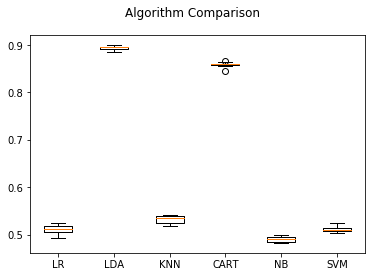

In [739]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Since ensemble method classifers seem promising from the results with DecisionTreeClassifier, train and compare ensemble method classifiers.

In [742]:
%%time
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('ADA', AdaBoostClassifier()))
models.append(('BAG', BaggingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ADA: 0.886380 (0.006614)
BAG: 0.876622 (0.004677)
RFC: 0.888895 (0.004026)
GBC: 0.900564 (0.005460)
Wall time: 2min 16s


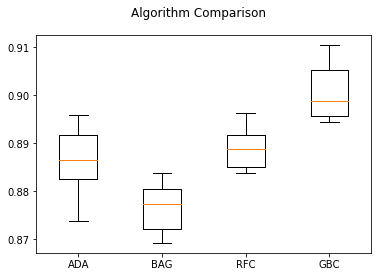

In [744]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<a id='tuning'></a>
### Model Tuning

GradientBoostingClassifier was selected for having the highest precision and f1-score amongst the fitted classifers. GridSearchCCV was used to fine-tune the model parameters.

In [781]:
clf_GB.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [928]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf_GB = GradientBoostingClassifier(random_state = 42)

# Create the parameters list to tune
parameters = {'n_estimators':[10, 20, 60, 100], 'learning_rate': [0.05, 0.1, 0.2, 1]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf_GB, param_grid = parameters, scoring = scorer, cv = 5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_GB.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9065
F-score on testing data: 0.9102

Optimized Model
------
Final accuracy score on the testing data: 0.9076
Final F-score on the testing data: 0.9118


### Feature Importance Extraction

In [790]:
feat_importances = pd.Series(clf_GB.feature_importances_, index=X_test.columns.values).sort_values(ascending=False)

In [968]:
def plot_barh(s_to_plot, title = '', xlabel = '', ylabel = '',
color_palette = 'YlGnBu', pre_unit = '', suff_unit = '', round_place = '',):
    '''
    Plot horizontal bar graph
    '''
    y_labels = s_to_plot.index

    # Plot the figure.
    plt.figure(figsize=(12, 20))
    ax = s_to_plot.plot(kind='barh')
    plt.barh(s_to_plot.index, s_to_plot,
            color = sns.color_palette(color_palette, len(s_to_plot.index)))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_yticklabels(y_labels)
    x_llim, x_ulim = ax.get_xlim()
    #x_ulim = xulim_set
    #ax.set_xlim(x_llim, xulim_set) # expand xlim to make labels easier to read
    plt.tight_layout()
    rects = ax.patches

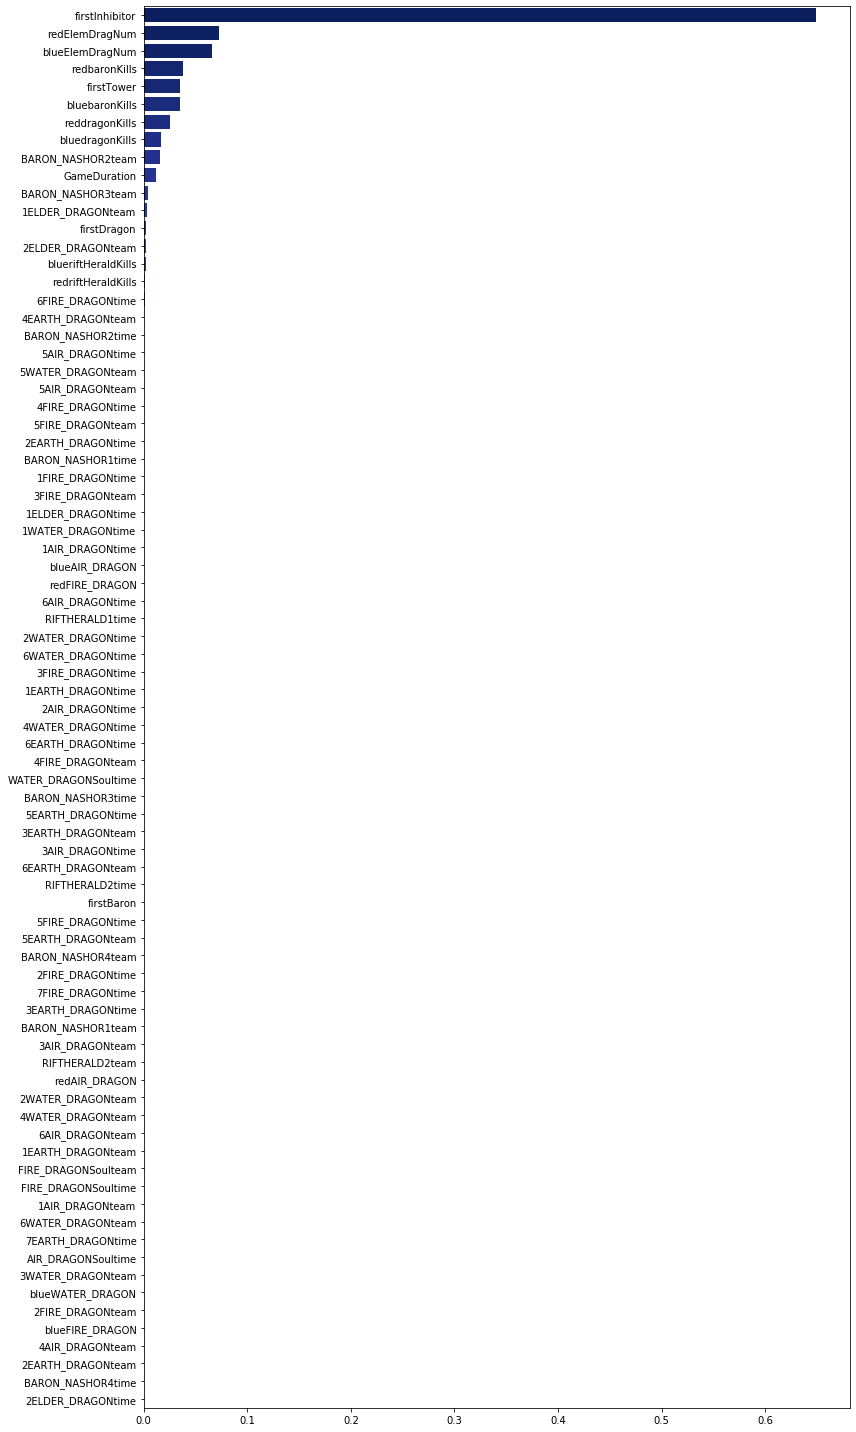

In [969]:
plot_barh(feat_importances[feat_importances > 0].sort_values())

In [971]:
pd.DataFrame(feat_importances[feat_importances > 0])

0
firstInhibitor     6.489103e-01
redElemDragNum     7.295672e-02
blueElemDragNum    6.624017e-02
redbaronKills      3.830563e-02
firstTower         3.491930e-02
...                         ...
blueFIRE_DRAGON    1.690759e-05
4AIR_DRAGONteam    2.279306e-06
2EARTH_DRAGONteam  1.420384e-06
BARON_NASHOR4time  1.109049e-06
2ELDER_DRAGONtime  9.713221e-07

[79 rows x 1 columns]

In [930]:
feat_importances[var_soul].sort_values(ascending=False)

WATER_DRAGONSoultime    0.000300
FIRE_DRAGONSoulteam     0.000099
FIRE_DRAGONSoultime     0.000098
AIR_DRAGONSoultime      0.000041
EARTH_DRAGONSoultime    0.000000
EARTH_DRAGONSoulteam    0.000000
AIR_DRAGONSoulteam      0.000000
WATER_DRAGONSoulteam    0.000000
dtype: float64

In [803]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(10), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

In [972]:
feat_importances[:30]

firstInhibitor         0.648910
redElemDragNum         0.072957
blueElemDragNum        0.066240
redbaronKills          0.038306
firstTower             0.034919
bluebaronKills         0.034776
reddragonKills         0.025468
bluedragonKills        0.016608
BARON_NASHOR2team      0.015860
GameDuration           0.012358
BARON_NASHOR3team      0.004313
1ELDER_DRAGONteam      0.003248
firstDragon            0.002674
2ELDER_DRAGONteam      0.002267
blueriftHeraldKills    0.001990
redriftHeraldKills     0.001301
6FIRE_DRAGONtime       0.000944
4EARTH_DRAGONteam      0.000799
BARON_NASHOR2time      0.000766
5AIR_DRAGONtime        0.000759
5WATER_DRAGONteam      0.000759
5AIR_DRAGONteam        0.000632
4FIRE_DRAGONtime       0.000627
5FIRE_DRAGONteam       0.000594
2EARTH_DRAGONtime      0.000560
BARON_NASHOR1time      0.000545
1FIRE_DRAGONtime       0.000491
3FIRE_DRAGONteam       0.000465
1ELDER_DRAGONtime      0.000429
1WATER_DRAGONtime      0.000426
dtype: float64

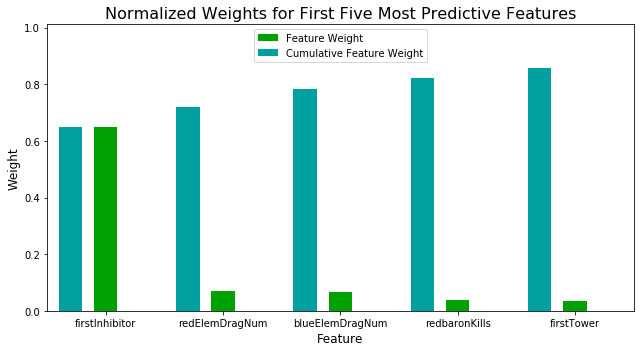

In [931]:
feature_plot(clf_GB.feature_importances_, X_train, y_train)

### Results of initial model

#### Dragon Soul

The data does seem to reflect what people think of the relative power levels of dragon souls - ocean is the most powerful IF you get it early. Cloud soul also contributes towards wins if it's obtained earlier in the game. This makes sense since ocean and cloud drake both grant advantages early and mid-game, but these advantages decrease as the game goes on. Come late game, the players' stats will have scaled enough and the game's pace will change to even out these dragon soul advantages. 

Ocean soul grants extra health and mana regeneration out of combat, which will help one team stay healthy throughout midgames during skirmishes, extended seiges and teamfights. Since it boosts regeneration, ocean soul is only useful if at least some players on a team stay alive after combat. Turrets still do significant damage to players midgame, so even if not everyone on a is alive, ocean soul helps the alive players stay healthy to defend with the safety of  structures. As the game goes on, player damage will have also increased to the point that players are more likely to die and the death timers are longer. Additionally, structural defenses, turrets, do less meaningful damage to players while players can destroy them more easily. As deaths become more impactful, any player who remain alive on a team while some of their teammates are dead find that ocean soul becomes less helpful in defense. 

Cloud soul increases movement speed and cooldown reduction on spells, granting one team a tempo advantage in moving around the map and having increased access to useful ultimate spells. Player will have more CDR items and have decreased cooldowns with higher level spells, so players will be more likely to have equal access to their ultimate spells later in the game. 

Infernal soul, on the other hand, remains powerful regardless of when the team obtains it. The infernal soul grants percent-based permanent damage bonuses to a team, so that advantage remains throughout the course of a game.

The top 5 most predictive features are:
1. team that takes first inhibitor
2. number of elemental dragons taken by red team
3. number of elemental dragons taken by blue team
4. number of baron kills taken by the red team
5. team that takes first tower

Which team kills the first inhibitor seems to be the best predictor of who will win the game. This makes sense since killing an inhibitor is the most direct path towards killing the enemy nexus. The first inhibitor kill accounts for 60% of the weights for predicting the game winner. 

The total number of elemental drakes taken by a team is the next best predictor, with red team dragon kills being slightly more predictive than blue team's. Without doing further analysis it's hard to say whether this difference is statistically significant. We can speculate that perhaps the red team's larger relative distance from the dragon pit compared to the blue team means that red team naturally has less control over the dragon; therefore, if the red team is successful at capturing dragon objectives, red likely has a strong control over the game carrying over to wins.

The order of importance of neutral objectives to the game result seems to be:
#### elemental dragons > baron > elder dragon > rift herald

### Early objectives

Of all the early objectives available (inhibitor, tower, dragon, baron, rift herald), it seems that the non-neutral objectives, inhibitors and towers, are the most predictive, followed by dragon and baron. First rift herald seem to have no predictive weight on the winner at all.

Of course, the associations here must be taken with a grain of salt before tranlating them to causation. Having early game pressure will translate to more objective control. However, it is very telling that first dragon has more weight than first herald, when both of these objectives are usually captured around the same time and are often "traded" for each other (if one team takes one, the other team will take the other).

In [ ]:
bool_params = ['firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 
               'firstRiftHerald']
num_params = ['baronKills', 'riftHeraldKills', 'dragonKills']

In [979]:
feat_importances[bool_params].sort_values(ascending=False)

firstInhibitor     0.648910
firstTower         0.034919
firstDragon        0.002674
firstBaron         0.000188
firstRiftHerald    0.000000
dtype: float64

<BarContainer object of 5 artists>

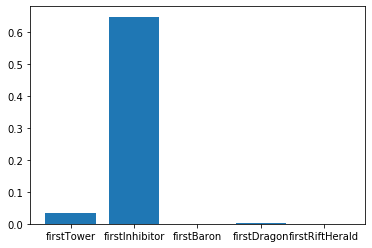

In [977]:
plt.bar(feat_importances[bool_params].index, feat_importances[bool_params])